## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0 matplotlib==3.8 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [4]:
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# split data into train and test sets
from sklearn.model_selection import train_test_split

# build linear regression model
from sklearn.linear_model import LinearRegression

# scaling data
from sklearn.preprocessing import StandardScaler

# check regression model's performance
from sklearn.metrics import mean_squared_error, r2_score

# build decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)



# Mount google drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [6]:
loan= pd.read_csv('/content/drive/MyDrive/Machine_learning_GL/Loan_Modelling.csv')
df_loan= loan.copy()

# For conversion to html

In [91]:
!jupyter nbconvert --to html /content/drive/MyDrive/Machine_learning_GL/Loan_ML_Project_full_code_notebook.ipynb


[NbConvertApp] Converting notebook /content/drive/MyDrive/Machine_learning_GL/Loan_ML_Project_full_code_notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 32 image(s).
[NbConvertApp] Writing 2990657 bytes to /content/drive/MyDrive/Machine_learning_GL/Loan_ML_Project_full_code_notebook.html


## Data Overview

In [17]:
df_loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [18]:
df_loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [19]:
df_loan.shape

(5000, 14)

In [20]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [21]:
df_loan.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
df_loan.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Observations:

There are 5000 rows and 14 columns in this dataset.

All the columns (13) in the dataset are of integer type except (CCAvg) which is float type.

5000 non-null is denoting no missing values in the dataframe.

The average age of customers is 45, customer's age lies between 23 to 67.

Experience mean is 20, but the minimum value for experience is -3 which needs to be examined, maximum experience is 43 years.

Standard deviation for age and experience is almost same i.e. 11.4

Income ranges from 8 to 224 thousand dollars, it has mean of 74 thousand dollars and standard deviation of 46 thousand dollars.

The mean of CCAvg is 1.93, standard deviation is 1.74, also it ranges from 0 to 10.

Mortgage has mean of 56.49 thousand dollars and standard deviation is 101.7 thousand dollars which is greater  and needs to be investigated.

# Checking missing and duplicate values

In [14]:
df_loan.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [15]:
df_loan.duplicated().sum()

0

In [16]:
df_loan.nunique()

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


# Data Preprocessing


In [16]:
df_loan.drop('ID', axis=1, inplace=True)

In [17]:
df_loan['Experience'].value_counts()

,count
Experience,
32,154
20,148
9,147
5,146
23,144
35,143
25,142
28,138
18,137


In [18]:
#imputing experience values that are lessthan 0
new_exp= df_loan.loc[(df_loan['Age']>23) & (df_loan['Age']<29) & (df_loan['Income']>12) & (df_loan['Income']<150) &
         (df_loan['Personal_Loan']==0) & (df_loan['CD_Account']==0), 'Experience'].median()
df_loan['Experience']= np.where(df_loan['Experience']<0, new_exp, df_loan['Experience'])

#checking experience values in dataset after change
df_loan['Experience'].value_counts()


,count
Experience,
32.0,154
20.0,148
9.0,147
5.0,146
23.0,144
35.0,143
25.0,142
28.0,138
18.0,137


In [19]:
#Education
df_loan['Education'].value_counts()

,count
Education,
1,2096
3,1501
2,1403


In [20]:
# checking the number of uniques in the zip code
df_loan['ZIPCode'].nunique()


467

In [21]:
df_loan["ZIPCode"] = df_loan["ZIPCode"].astype(str) # Convert ZIPCode to string
print("Number of unique values if we take first two digits of ZIPCode: ", df_loan["ZIPCode"].str[0:2].nunique()) # to find unique two-digit prefixes in ZIP codes
df_loan["ZIPCode"] = df_loan["ZIPCode"].str[0:2] #pick 1st 2 digits of ZIPCode
df_loan["ZIPCode"] = df_loan["ZIPCode"].astype("category") # convert ZIPCode to categorical datatype

Number of unique values if we take first two digits of ZIPCode:  7


In [22]:
df_loan['ZIPCode'].value_counts()

,count
ZIPCode,
94,1472
92,988
95,815
90,703
91,565
93,417
96,40


# Observations:
### ID:
Drop the ID as its eual to no.of rows in dataframe, and do not add any value to the analysis.

### Experience:
Also, I will impute Negative valued rows of Experience column since it doesnot make any sense and can affect the analysis further.

There are: 2096 Undergraduate, 1403 Graduate and 1501 Advanced/Professionals.

### ZIPCode:
Above conversion of ZIPCode is done to reduce the granularity of ZIP codes to their two-digit prefixes and then optimizing memory usage by converting them to a categorical type. This may be useful in further analysis, or visualization.


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

## Univariate and Bivariate Analysis

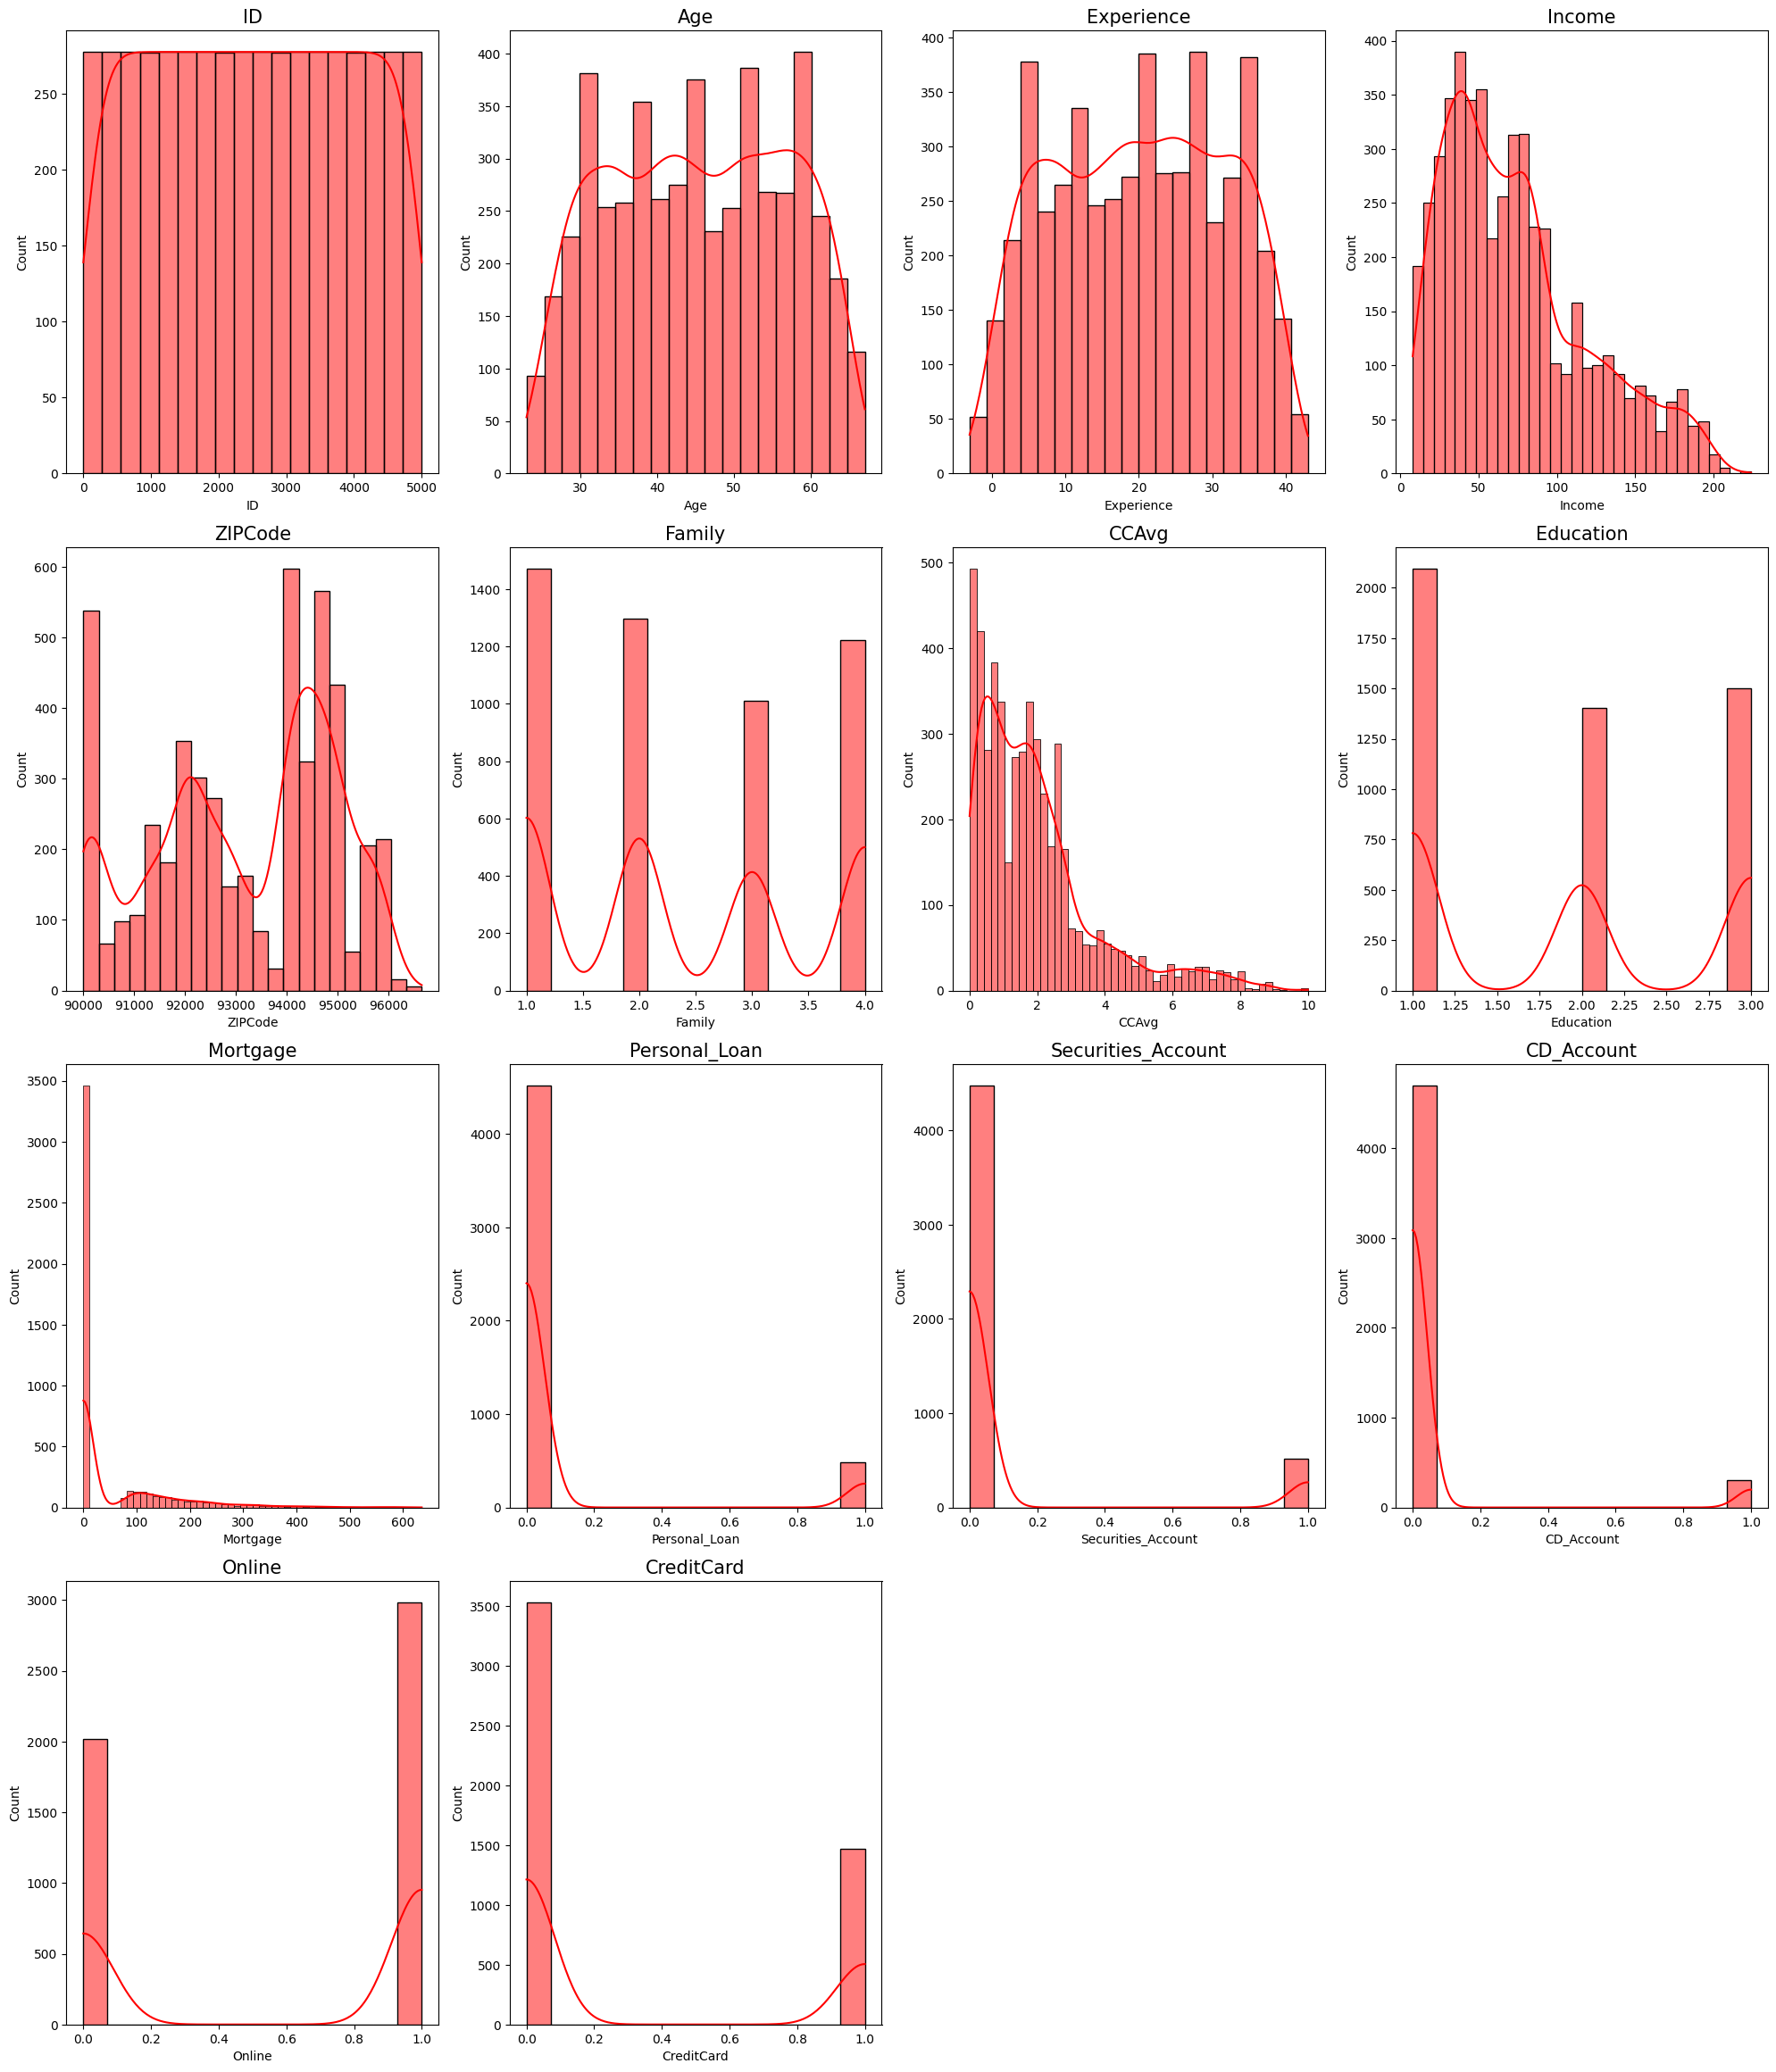

<Figure size 640x480 with 0 Axes>

In [23]:
#viewing all the fields/columns plots together
fields_all = df_loan.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,75))

for i in range(len(fields_all)):
    plt.subplot(13, 4, i + 1)
    sns.histplot(df_loan[fields_all[i]], kde=True, color='Red')
    plt.xlabel(fields_all[i])
    plt.title(fields_all[i], fontsize=15)
    plt.tight_layout()
plt.show()
plt.savefig('all_univariate_analysis.png')

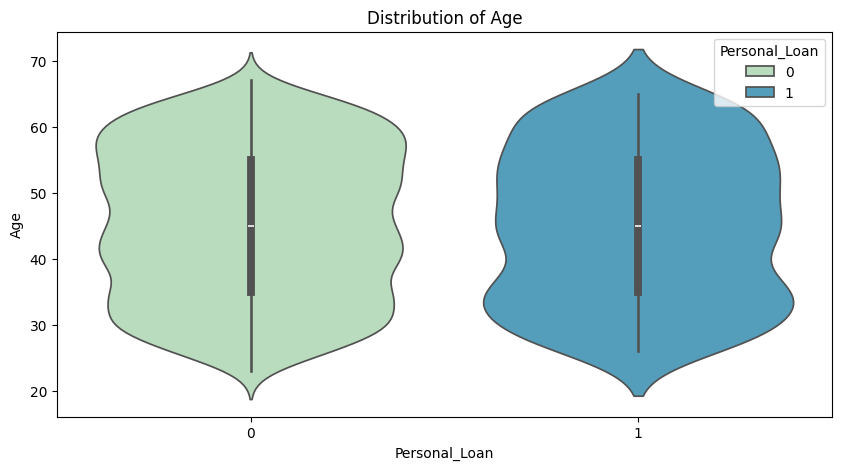

<Figure size 640x480 with 0 Axes>

In [24]:
#Violinplot between personal_loan and Age
plt.figure(figsize=(10, 5))
sns.violinplot(data= df_loan, x= 'Personal_Loan', y= 'Age', hue= 'Personal_Loan', palette='GnBu')
plt.xlabel('Personal_Loan')
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.show()
plt.savefig('personal_loan_age_violinplot.png')

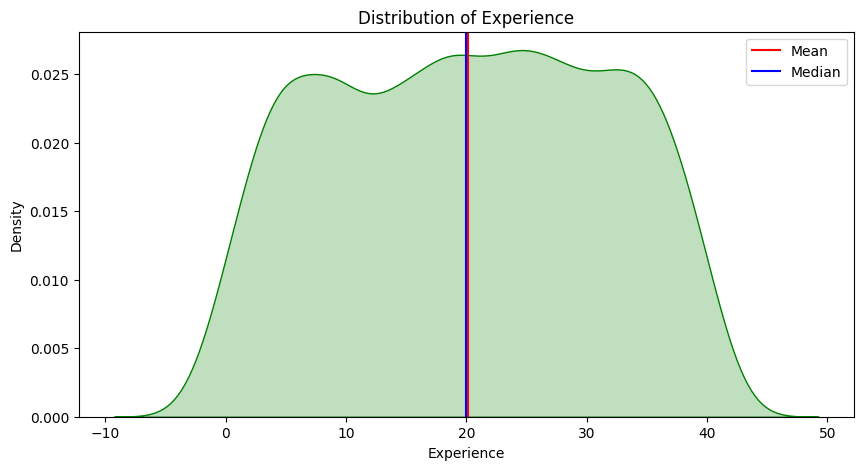

<Figure size 640x480 with 0 Axes>

In [25]:
#KDE plot for experience
plt.figure(figsize=(10, 5))
sns.kdeplot(data= df_loan, x= 'Experience', fill=True, color='Green')
plt.xlabel('Experience')
plt.ylabel('Density')
plt.title('Distribution of Experience')
plt.axvline(df_loan['Experience'].mean(), color='red', label='Mean' )
plt.axvline(df_loan['Experience'].median(), color='blue', label='Median')
plt.legend()
plt.show()
plt.savefig('kde_experience.png')

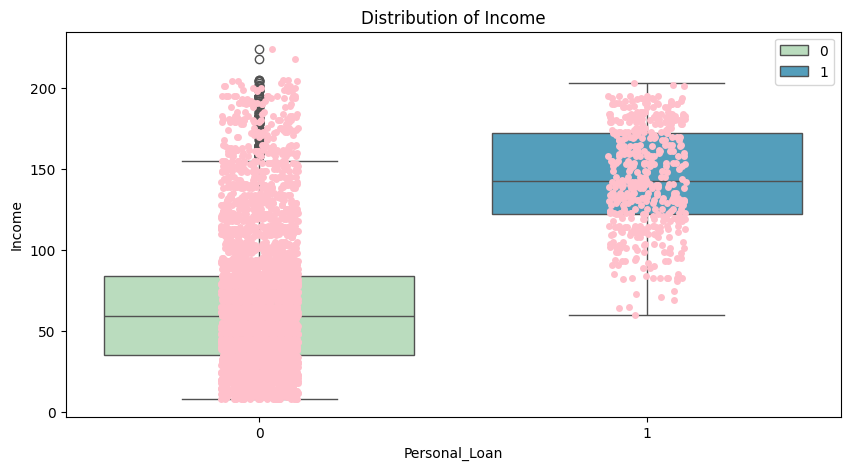

<Figure size 640x480 with 0 Axes>

In [26]:
# boxplot between Personal_loan and Income
plt.figure(figsize=(10, 5))
sns.boxplot(data= df_loan, x= 'Personal_Loan', y= 'Income', hue= 'Personal_Loan', palette='GnBu')
sns.stripplot(data= df_loan, x= 'Personal_Loan', y= 'Income', color='pink', jitter=True)
plt.xlabel('Personal_Loan')
plt.ylabel('Income')
plt.title('Distribution of Income')
plt.show()
plt.savefig('personal_loan_income_boxplot.png')

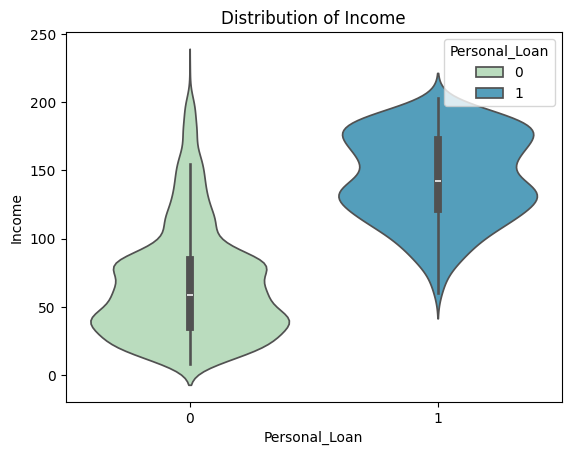

<Figure size 640x480 with 0 Axes>

In [27]:
#violinplot between Income and Personal Loan
sns.violinplot(data= df_loan, x= 'Personal_Loan', y= 'Income', hue= 'Personal_Loan', palette='GnBu')
plt.xlabel('Personal_Loan')
plt.ylabel('Income')
plt.title('Distribution of Income')
plt.show()
plt.savefig('personal_loan_income_violinplot.png')

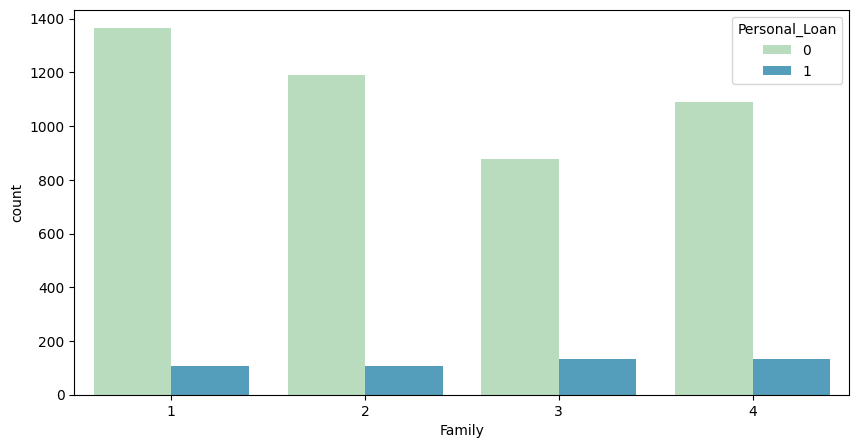

<Figure size 640x480 with 0 Axes>

In [28]:
#barplot between personal_loan and Family
plt.figure(figsize=(10, 5))
sns.countplot(data= df_loan, x= 'Family', hue= 'Personal_Loan', palette='GnBu')
plt.xlabel('Family')
plt.show()
plt.savefig('personal_loan_family_barplot.png')

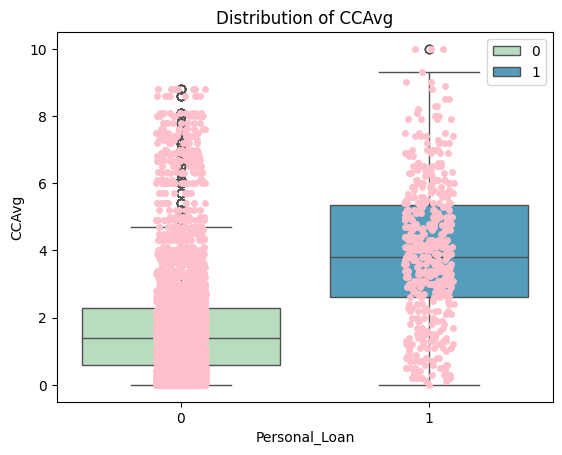

<Figure size 640x480 with 0 Axes>

In [29]:
# plot between CCAvg and Personal_loan
sns.boxplot(data= df_loan, x= 'Personal_Loan', y= 'CCAvg', hue= 'Personal_Loan', palette='GnBu')
sns.stripplot(data= df_loan, x= 'Personal_Loan', y= 'CCAvg', color='pink', jitter=True)
plt.xlabel('Personal_Loan')
plt.ylabel('CCAvg')
plt.title('Distribution of CCAvg')
plt.show()
plt.savefig('personal_loan_CCAvg_boxplot.png')

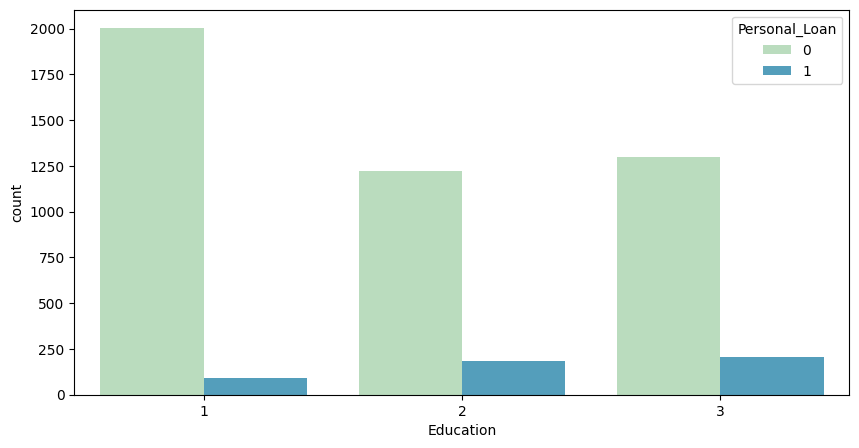

<Figure size 640x480 with 0 Axes>

In [30]:
#barplot between personal_loan and Education
plt.figure(figsize=(10, 5))
sns.countplot(data= df_loan, x= 'Education', hue= 'Personal_Loan', palette='GnBu')
plt.xlabel('Education')
plt.show()
plt.savefig('personal_loan_education_barplot.png')


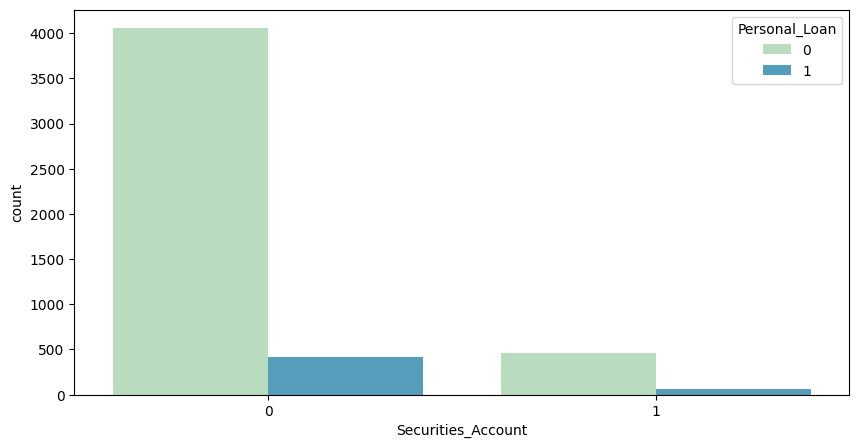

<Figure size 640x480 with 0 Axes>

In [31]:
#barplot between personal_loan and Securities_Account
plt.figure(figsize=(10, 5))
sns.countplot(data= df_loan, x= 'Securities_Account', hue= 'Personal_Loan', palette='GnBu')
plt.xlabel('Securities_Account')
plt.show()
plt.savefig('personal_loan_Securities_Account_barplot.png')


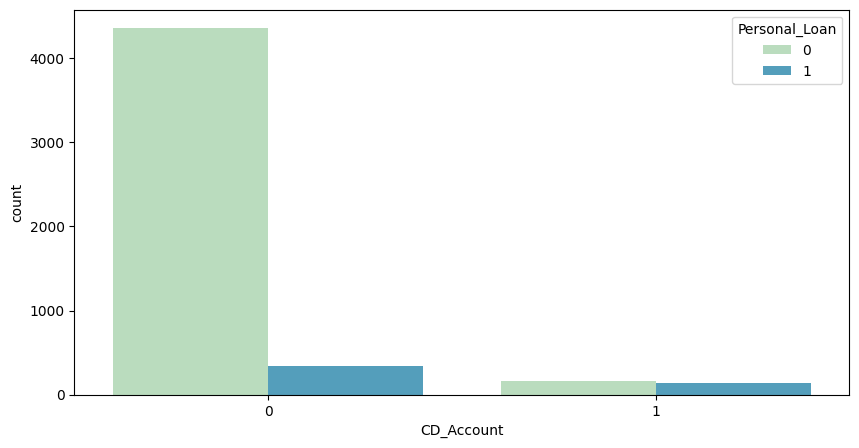

<Figure size 640x480 with 0 Axes>

In [32]:
#barplot between personal_loan and CD_Account
plt.figure(figsize=(10, 5))
sns.countplot(data= df_loan, x= 'CD_Account', hue= 'Personal_Loan', palette='GnBu')
plt.xlabel('CD_Account')
plt.show()
plt.savefig('personal_loan_CD_Account_barplot.png')

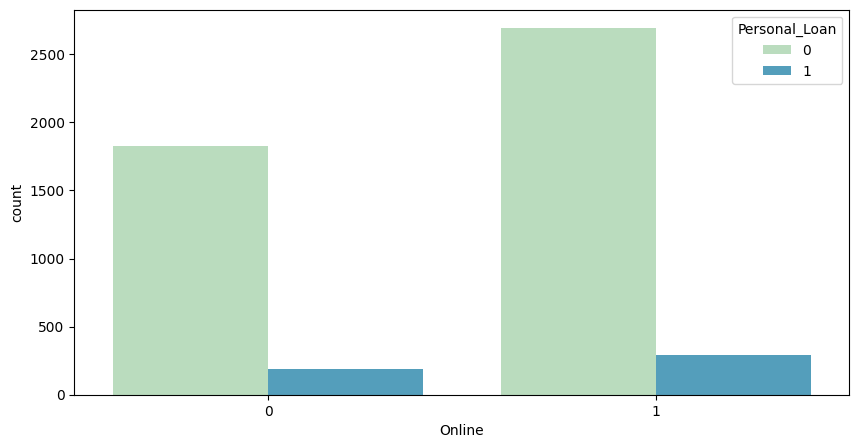

<Figure size 640x480 with 0 Axes>

In [33]:
#barplot between personal_loan and Online
plt.figure(figsize=(10, 5))
sns.countplot(data= df_loan, x= 'Online', hue= 'Personal_Loan', palette='GnBu')
plt.xlabel('Online')
plt.show()
plt.savefig('personal_loan_Online_barplot.png')


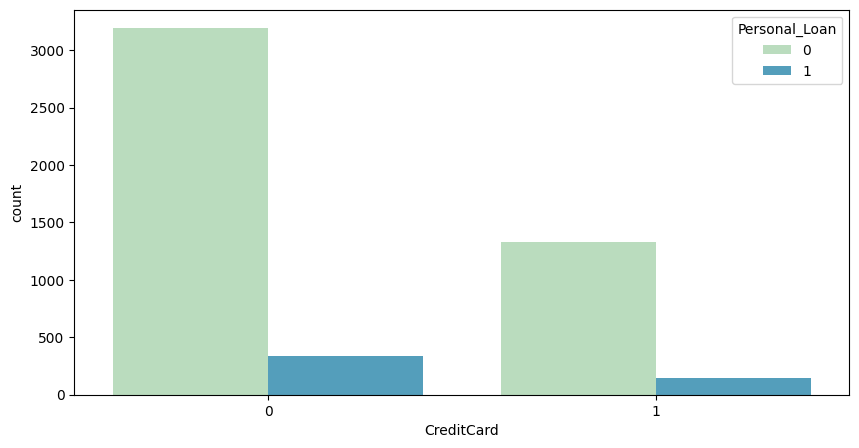

<Figure size 640x480 with 0 Axes>

In [34]:
#barplot between personal_loan and CreditCard
plt.figure(figsize=(10, 5))
sns.countplot(data= df_loan, x= 'CreditCard', hue= 'Personal_Loan', palette='GnBu')
plt.xlabel('CreditCard')
plt.show()
plt.savefig('personal_loan_CreditCard_barplot.png')


##Observation
The plots above are showing all the column's data:
Age and Experience has some high projections.

Income, CCAvg and Mortgage are showing skewed distributions (mostly rightly skewed).

Customers with higher income have personal loans. Also, customers with credit card usage have personal loans.


The customers with a family of 4 have more personal loans.
A family of 3 have the second most personal loans followed by a family of 1 and 2.

Education plot is showing that most customers are married or have a graduate education.

Personal_Loan plot is showing that a majority of customers did not accept loan.







# outlier detection


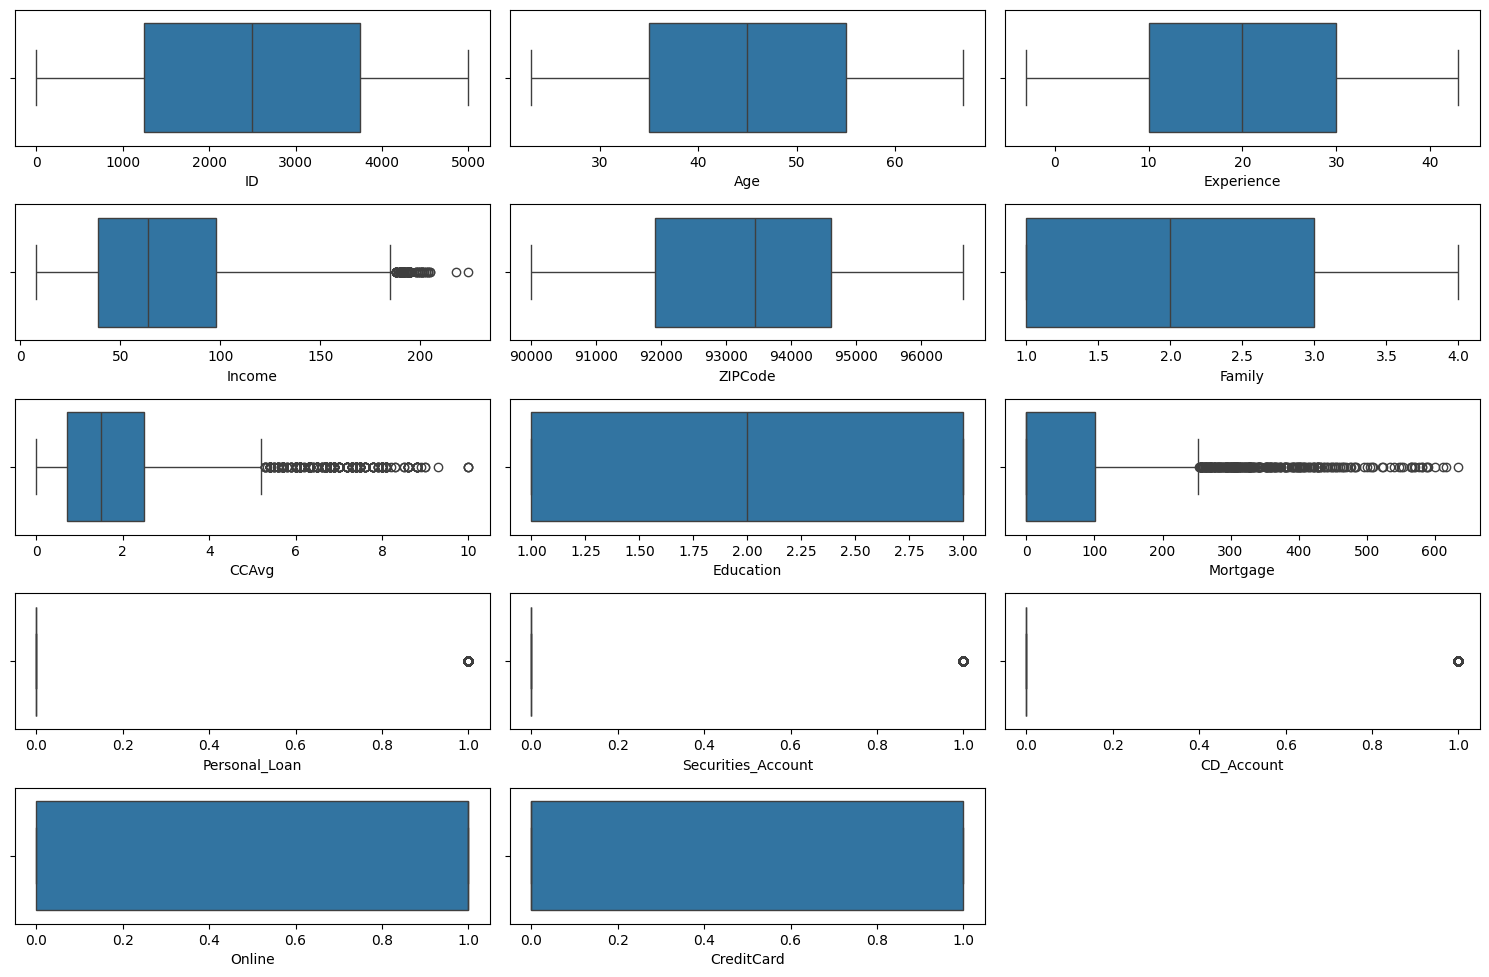

<Figure size 640x480 with 0 Axes>

In [35]:
# Outlier Detection
features = df_loan.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,25))
for i, feature in enumerate(features):
    plt.subplot(13,3,i+1)
    sns.boxplot(data= df_loan, x= feature)
    plt.xlabel(feature)
    plt.tight_layout()
plt.show()
plt.savefig('outlier_detection.png')

In [36]:
#Q1, Q3 & IQR for Income
Q1i= df_loan['Income'].quantile(0.25)
Q3i= df_loan['Income'].quantile(0.75)
IQR= Q3i-Q1i
print('Q1 for Income is:', Q1i)
print('Q3 for Income is:', Q3i)
print('IQR for Income is:', IQR)

Q1 for Income is: 39.0
Q3 for Income is: 98.0
IQR for Income is: 59.0


In [37]:
# finding upper and lower Quartile for Income
lower_qi= Q1i-1.5*IQR
upper_qi= Q3i+1.5*IQR
print('The values for lower_quartile and upper_quartile for Income are {} and {} respectively.'.format(lower_qi, upper_qi))


The values for lower_quartile and upper_quartile for Income are -49.5 and 186.5 respectively.


In [38]:
#Q1, Q3 & IQR for CCAvg
Q1c= df_loan['CCAvg'].quantile(0.25)
Q3c= df_loan['CCAvg'].quantile(0.75)
IQR= Q3c-Q1c
print('Q1 for CCAvg is:', Q1c)
print('Q3 for CCAvg is:', Q3c)
print('IQR for CCAvg is:', IQR)

Q1 for CCAvg is: 0.7
Q3 for CCAvg is: 2.5
IQR for CCAvg is: 1.8


In [39]:
# finding upper and lower Quartile for CCAvg
lower_qc= Q1c-1.5*IQR
upper_qc= Q3c+1.5*IQR
print('The values for lower_quartile and upper_quartile for CCAvg are {} and {} respectively.'.format(lower_qc, upper_qc))

The values for lower_quartile and upper_quartile for CCAvg are -2.0 and 5.2 respectively.


# Observations:

There are outliers in Income, Mortgage and CCAvg columns.

###Income:
Q1 for Income is: 39.0,
Q3 for Income is: 98.0,
IQR for Income is: 59.0.

The values for lower_quartile and upper_quartile are -49.5 and 186.5 respectively.

###CCAvg:
Q1 for CCAvg is: 0.7,
Q3 for CCAvg is: 2.5,
IQR for CCAvg is: 1.8.

The values for lower_quartile and upper_quartile are -2.0 and 5.2 respectively.





# Ques/Ans

In [40]:
# Q1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
df_loan['Mortgage'].value_counts()

,count
Mortgage,
0,3462
98,17
119,16
89,16
91,16
...,...
547,1
458,1
505,1


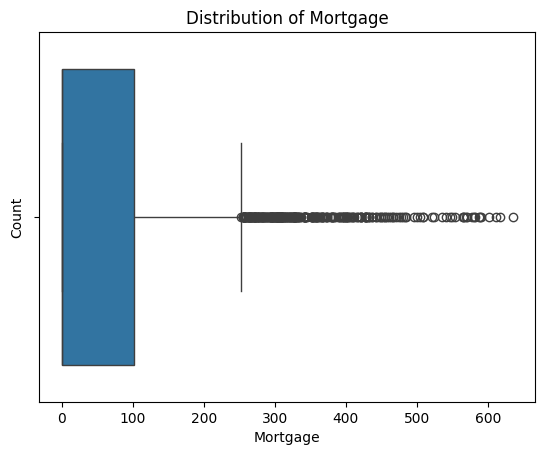

<Figure size 640x480 with 0 Axes>

In [41]:
# boxplot for mortgage
sns.boxplot(data= df_loan, x= 'Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Count')
plt.title('Distribution of Mortgage')
plt.show()
plt.savefig('mortgage_boxplot.png')

In [42]:
#Outlier detection for Mortgage
Q1= df_loan['Mortgage'].quantile(0.25)
Q3= df_loan['Mortgage'].quantile(0.75)
IQR= Q3-Q1
print('Q1 for Mortgage is:', Q1)
print('Q3 for Mortgage is:', Q3)
print('IQR for Mortgage is:', IQR)


Q1 for Mortgage is: 0.0
Q3 for Mortgage is: 101.0
IQR for Mortgage is: 101.0


In [43]:
# finding upper and lower Quartile
lower_quartile= Q1-1.5*IQR
upper_quartile= Q3+1.5*IQR
print('The values for lower_quartile and upper_quartilefor Mortgage are {} and {} respectively.'.format(lower_quartile, upper_quartile))


The values for lower_quartile and upper_quartilefor Mortgage are -151.5 and 252.5 respectively.


# Observations: Ans 1.
The data suggets that most of the people donot have mortgage as its value is 0 for 3462 customers.

###Mortgage
There are outliers and its looks highly skewed.

Q1 for Mortgage is: 0.0,
Q3 for Mortgage is: 101.0,
IQR for Mortgage is: 101.0.

The values for lower_quartile and upper_quartile are -151.5 and 252.5 respectively.



In [44]:
# Q2. How many customers have credit cards?
df_loan['CreditCard'].value_counts()

,count
CreditCard,
0,3530
1,1470


# Observations: Ans2.

There are 1470 customers with 1 credit card and 3530 customers without credit card.

In [45]:
# What are the attributes that have a strong correlation with the target attribute (personal loan)?
df_loan.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [46]:
# Q3. Calculate the correlation matrix between Age, Experience, Income, Personal_Loan, CCAvg, Mortgage, Education
correlation_matrix = df_loan[['Age', 'Experience', 'Income', 'Personal_Loan', 'CCAvg', 'Mortgage', 'Education']].corr()
correlation_matrix

,Age,Experience,Income,Personal_Loan,CCAvg,Mortgage,Education
Age,1.000000,0.994215,-0.055269,-0.007726,-0.052012,-0.012539,0.041334
Experience,0.994215,1.000000,-0.046574,-0.007413,-0.050077,-0.010582,0.013152
Income,-0.055269,-0.046574,1.000000,0.502462,0.645984,0.206806,-0.187524
Personal_Loan,-0.007726,-0.007413,0.502462,1.000000,0.366889,0.142095,0.136722
CCAvg,-0.052012,-0.050077,0.645984,0.366889,1.000000,0.109905,-0.136124
Mortgage,-0.012539,-0.010582,0.206806,0.142095,0.109905,1.000000,-0.033327
Education,0.041334,0.013152,-0.187524,0.136722,-0.136124,-0.033327,1.000000


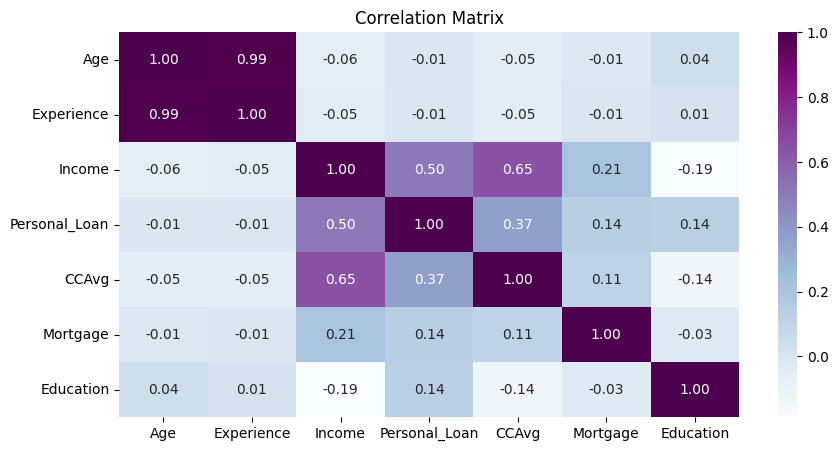

<Figure size 640x480 with 0 Axes>

In [47]:
# heatmap between Age, Experience, Income, Personal_Loan, CCAvg, Mortgage, Education
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
plt.savefig('correlation_matrix.png')

# Observations: Ans3.

Age and Experience are highly coorelated with a value of 0.99.

The correlation between Income and Age is -0.06, it suggests that there is almost no relationship between a person's income and their age, and any slight decrease in income with increasing age (or vice versa) is negligible and would likely be due to random chance or external factors, not a meaningful pattern.

The correlation between Personal_loan and Income is 0.5, which indicates a moderate positive relationship, where higher income tends to be associated with a higher chances of taking out a personal loan, but it’s not a perfect or strong relationship.

Income is highly coorelated with CCAvg and Mortgage with correlation of 0.65 and 0.21 respectively.

The value 0.14 (Education and Personal_loan) is showing a weak positive linear relationship.

All the other columns(viz. Personal_loan with Age & Experience, CCAvg with Age & Experience, Mortgage with Age & Experience) correlated values are showing relationship is very weak and slightly negative.

In [48]:
#scatterplot columns in df_loan
plt.figure(figsize=(12,8))
sns.pairplot(df_loan, vars= features, hue='Personal_Loan', diag_kind='kde');
plt.show()
plt.savefig('pairplot.png')

Output hidden; open in https://colab.research.google.com to view.

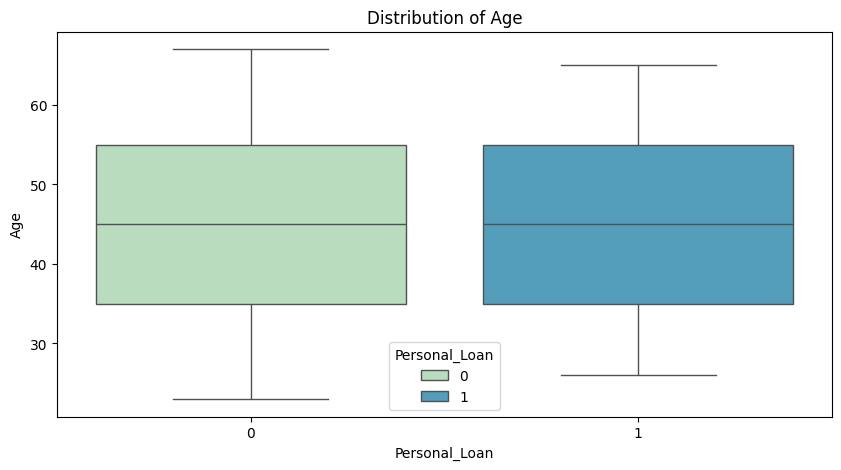

<Figure size 640x480 with 0 Axes>

In [49]:
# Q4. How does a customer's interest in purchasing a loan vary with their age?
#boxplot between personal_loan and Age
plt.figure(figsize=(10, 5))
sns.boxplot(data= df_loan, x= 'Personal_Loan', y= 'Age', hue= 'Personal_Loan', palette='GnBu')
plt.xlabel('Personal_Loan')
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.show()
plt.savefig('personal_loan_age_boxplot.png')


# Observation: Ans4:
There is correlation between Age and Personal_loan

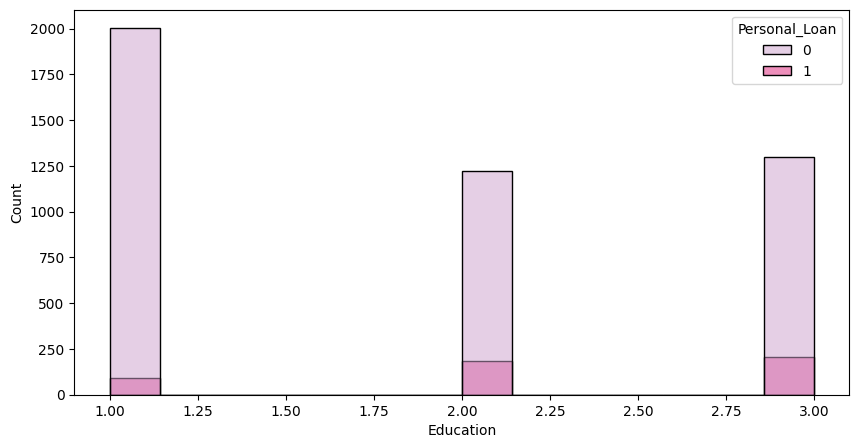

<Figure size 640x480 with 0 Axes>

In [50]:
# Q5. How does a customer's interest in purchasing a loan vary with their education?
#histplot between personal_loan and Education
plt.figure(figsize=(10, 5))
sns.histplot(data= df_loan, x= 'Education', hue= 'Personal_Loan', palette='PuRd')
plt.xlabel('Education')
plt.show()
plt.savefig('personal_loan_education_histplot.png')

# Observation:Ans5.
Education plot is showing that most customers have a graduate education.
The value 0.14 is small but positive, suggesting a weak positive linear relationship between education level and loan amount.
As education level increases, loan amounts tend to increase slightly, but the relationship is weak.

# Data Preparation for Modeling

In [51]:
# Defining the explanatory(independent) and response (dependent) variables
X = df_loan.drop(["Personal_Loan", "Experience"], axis=1)# dropping Experience as it is perfectly correlated with Age

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X = X.astype(float)
X.head()

,ID,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_90007,ZIPCode_90009,ZIPCode_90011,ZIPCode_90016,ZIPCode_90018,ZIPCode_90019,ZIPCode_90024,ZIPCode_90025,ZIPCode_90027,ZIPCode_90028,ZIPCode_90029,ZIPCode_90032,ZIPCode_90033,ZIPCode_90034,ZIPCode_90035,ZIPCode_90036,ZIPCode_90037,ZIPCode_90041,ZIPCode_90044,ZIPCode_90045,ZIPCode_90048,ZIPCode_90049,ZIPCode_90057,ZIPCode_90058,ZIPCode_90059,ZIPCode_90064,ZIPCode_90065,ZIPCode_90066,ZIPCode_90068,ZIPCode_90071,ZIPCode_90073,ZIPCode_90086,ZIPCode_90089,ZIPCode_90095,ZIPCode_90210,ZIPCode_90212,ZIPCode_90230,ZIPCode_90232,ZIPCode_90245,ZIPCode_90250,ZIPCode_90254,ZIPCode_90266,ZIPCode_90272,ZIPCode_90274,ZIPCode_90275,ZIPCode_90277,ZIPCode_90280,ZIPCode_90291,ZIPCode_90304,ZIPCode_90401,ZIPCode_90404,ZIPCode_90405,ZIPCode_90502,ZIPCode_90503,ZIPCode_90504,ZIPCode_90505,ZIPCode_90509,ZIPCode_90601,ZIPCode_90623,ZIPCode_90630,ZIPCode_90638,ZIPCode_90639,ZIPCode_90640,ZIPCode_90650,ZIPCode_90717,ZIPCode_90720,ZIPCode_90740,ZIPCode_90745,ZIPCode_90747,ZIPCode_90755,ZIPCode_90813,ZIPCode_90840,ZIPCode_91006,ZIPCode_91007,ZIPCode_91016,ZIPCode_91024,ZIPCode_91030,ZIPCode_91040,ZIPCode_91101,ZIPCode_91103,ZIPCode_91105,ZIPCode_91107,ZIPCode_91109,ZIPCode_91116,ZIPCode_91125,ZIPCode_91129,ZIPCode_91203,ZIPCode_91207,ZIPCode_91301,ZIPCode_91302,ZIPCode_91304,ZIPCode_91311,ZIPCode_91320,ZIPCode_91326,ZIPCode_91330,ZIPCode_91335,ZIPCode_91342,ZIPCode_91343,ZIPCode_91345,ZIPCode_91355,ZIPCode_91360,ZIPCode_91361,ZIPCode_91365,ZIPCode_91367,ZIPCode_91380,ZIPCode_91401,ZIPCode_91423,ZIPCode_91604,ZIPCode_91605,ZIPCode_91614,ZIPCode_91706,ZIPCode_91709,ZIPCode_91710,ZIPCode_91711,ZIPCode_91730,ZIPCode_91741,ZIPCode_91745,ZIPCode_91754,ZIPCode_91763,ZIPCode_91765,ZIPCode_91768,ZIPCode_91770,ZIPCode_91773,ZIPCode_91775,ZIPCode_91784,ZIPCode_91791,ZIPCode_91801,ZIPCode_91902,ZIPCode_91910,ZIPCode_91911,ZIPCode_91941,ZIPCode_91942,ZIPCode_91950,ZIPCode_92007,ZIPCode_92008,ZIPCode_92009,ZIPCode_92024,ZIPCode_92028,ZIPCode_92029,ZIPCode_92037,ZIPCode_92038,ZIPCode_92054,ZIPCode_92056,ZIPCode_92064,ZIPCode_92068,ZIPCode_92069,ZIPCode_92084,ZIPCode_92093,ZIPCode_92096,ZIPCode_92101,ZIPCode_92103,ZIPCode_92104,ZIPCode_92106,ZIPCode_92109,ZIPCode_92110,ZIPCode_92115,ZIPCode_92116,ZIPCode_92120,ZIPCode_92121,ZIPCode_92122,ZIPCode_92123,ZIPCode_92124,ZIPCode_92126,ZIPCode_92129,ZIPCode_92130,ZIPCode_92131,ZIPCode_92152,ZIPCode_92154,ZIPCode_92161,ZIPCode_92173,ZIPCode_92177,ZIPCode_92182,ZIPCode_92192,ZIPCode_92220,ZIPCode_92251,ZIPCode_92325,ZIPCode_92333,ZIPCode_92346,ZIPCode_92350,ZIPCode_92354,ZIPCode_92373,ZIPCode_92374,ZIPCode_92399,ZIPCode_92407,ZIPCode_92507,ZIPCode_92518,ZIPCode_92521,ZIPCode_92606,ZIPCode_92612,ZIPCode_92614,ZIPCode_92624,ZIPCode_92626,ZIPCode_92630,ZIPCode_92634,ZIPCode_92646,ZIPCode_92647,ZIPCode_92648,ZIPCode_92653,ZIPCode_92660,ZIPCode_92661,ZIPCode_92672,ZIPCode_92673,ZIPCode_92675,ZIPCode_92677,ZIPCode_92691,ZIPCode_92692,ZIPCode_92694,ZIPCode_92697,ZIPCode_92703,ZIPCode_92704,ZIPCode_92705,ZIPCode_92709,ZIPCode_92717,ZIPCode_92735,ZIPCode_92780,ZIPCode_92806,ZIPCode_92807,ZIPCode_92821,ZIPCode_92831,ZIPCode_92833,ZIPCode_92834,ZIPCode_92835,ZIPCode_92843,ZIPCode_92866,ZIPCode_92867,ZIPCode_92868,ZIPCode_92870,ZIPCode_92886,ZIPCode_93003,ZIPCode_93009,ZIPCode_93010,ZIPCode_93014,ZIPCode_93022,ZIPCode_93023,ZIPCode_93033,ZIPCode_93063,ZIPCode_93065,ZIPCode_93077,ZIPCode_93101,ZIPCode_93105,ZIPCode_93106,ZIPCode_93107,ZIPCode_93108,ZIPCode_93109,ZIPCode_93111,ZIPCode_93117,ZIPCode_93118,ZIPCode_93302,ZIPCode_93305,ZIPCode_93311,ZIPCode_93401,ZIPCode_93403,ZIPCode_93407,ZIPCode_93437,ZIPCode_93460,ZIPCode_93524,ZIPCode_93555,ZIPCode_93561,ZIPCode_93611,ZIPCode_93657,ZIPCode_93711,ZIPCode_93720,ZIPCode_93727,ZIPCode_93907,ZIPCode_93933,ZIPCode_93940,ZIPCode_93943,ZIPCode_93950,ZIPCode_93955,ZIPCode_94002,ZIPCode_94005,ZIPCode_94010,ZIPCode_94015,ZIPCode_94019,ZIPCode_94022,ZIPCode_94024,ZIPCode_94025,ZIPCode_94028,ZIPCode_94035,ZIPCode_9

In [52]:
Y = df_loan["Personal_Loan"]
Y.head()

,Personal_Loan
0,0
1,0
2,0
3,0
4,0


In [53]:
# Splitting data in train and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X, # specifying the independent variables
    Y, # specifying the dependent variables
    test_size=0.30, #specifying the size of test set as a fraction
    stratify=Y, #specifying the target variable for stratification
    random_state=42 #specifying the random state for reproducibility
)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 478)
Shape of test set :  (1500, 478) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


## Model Building

## Decision Tree(sklearn default)

In [54]:
# creating an instance of Decision tree model
dtreel= DecisionTreeClassifier(random_state=42)

# fitting the model to training data
dtreel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation Criterion

Defining a utility function to collate all the metrics into a single dataframe, and another to plot the confusion matrix.

In [55]:
# defining a function to compute different metrics to check performance of a classification model built
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [56]:
# defining a function to plot the confusion_matrix of a classification model


def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
     """
    y_pred = model.predict(predictors)  # predicting target values using model and independent variables
    cm = confusion_matrix(target, y_pred) # compute confusion matrix comparing true target values with predicted values

    #create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2) #reshaping to a matrix

    plt.figure(figsize=(6, 4)) #set figure size for plot
    sns.heatmap(cm, annot=labels, fmt="") # plot confusion matirx as a heatmap with the labels
    plt.ylabel("True label") # set label for true values(Y-axis)
    plt.xlabel("Predicted label") # set label for predicted values(X-axis)
    plt.title("Confusion Matrix") # set title for plot
    plt.show() # show plot

### Model Building using default (Gini criteria) is applied to split. This is done by DecisionTreeClassifier function.

In [57]:
model = DecisionTreeClassifier(criterion="gini", random_state=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

### Plotting confusion matrix on training set (SKlearn default)

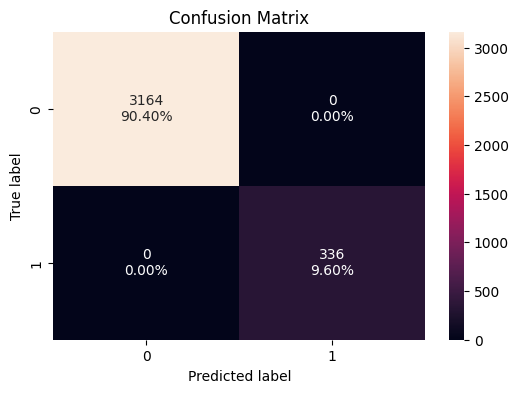

<Figure size 640x480 with 0 Axes>

In [58]:
plot_confusion_matrix(dtreel, X_train, y_train)
plt.savefig('dtree1_train_confusion_matrix.png')

#Checking Performance on Training and Test set

In [59]:
dtree1_train_perf= model_performance_classification(dtreel, X_train, y_train)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### The model's predictions are 100% accurate. The model might have memorized the training data and performed perfectly on it but might not generalize well to unseen data. So, we need to check the performance on the test set to confirm this is not an overfitting case.

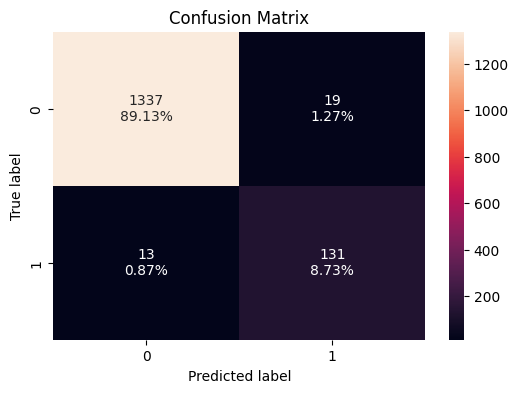

In [60]:
plot_confusion_matrix(dtreel, X_test, y_test)

In [61]:
dtree1_test_perf= model_performance_classification(dtreel, X_test, y_test)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.978667,0.909722,0.873333,0.891156


# Observations:
Recall on Training Set is 100% meaning the model correctly shows all positives in the training set (no false negatives). This means the model is very complex, i.e. overfitting.

Recall on Test Set is 92.3% means the model is still performing well but is missing some positive instances in the test set. The drop in recall suggests the model might not generalize perfectly to unseen data.

There is a slight Drop from Training Metrics. As compared to the training set, the slight drop in precision and F1-score might indicate that the model is slightly overfitting or that the test set contains some harder-to-predict cases.






### Visualizing the Decision Tree

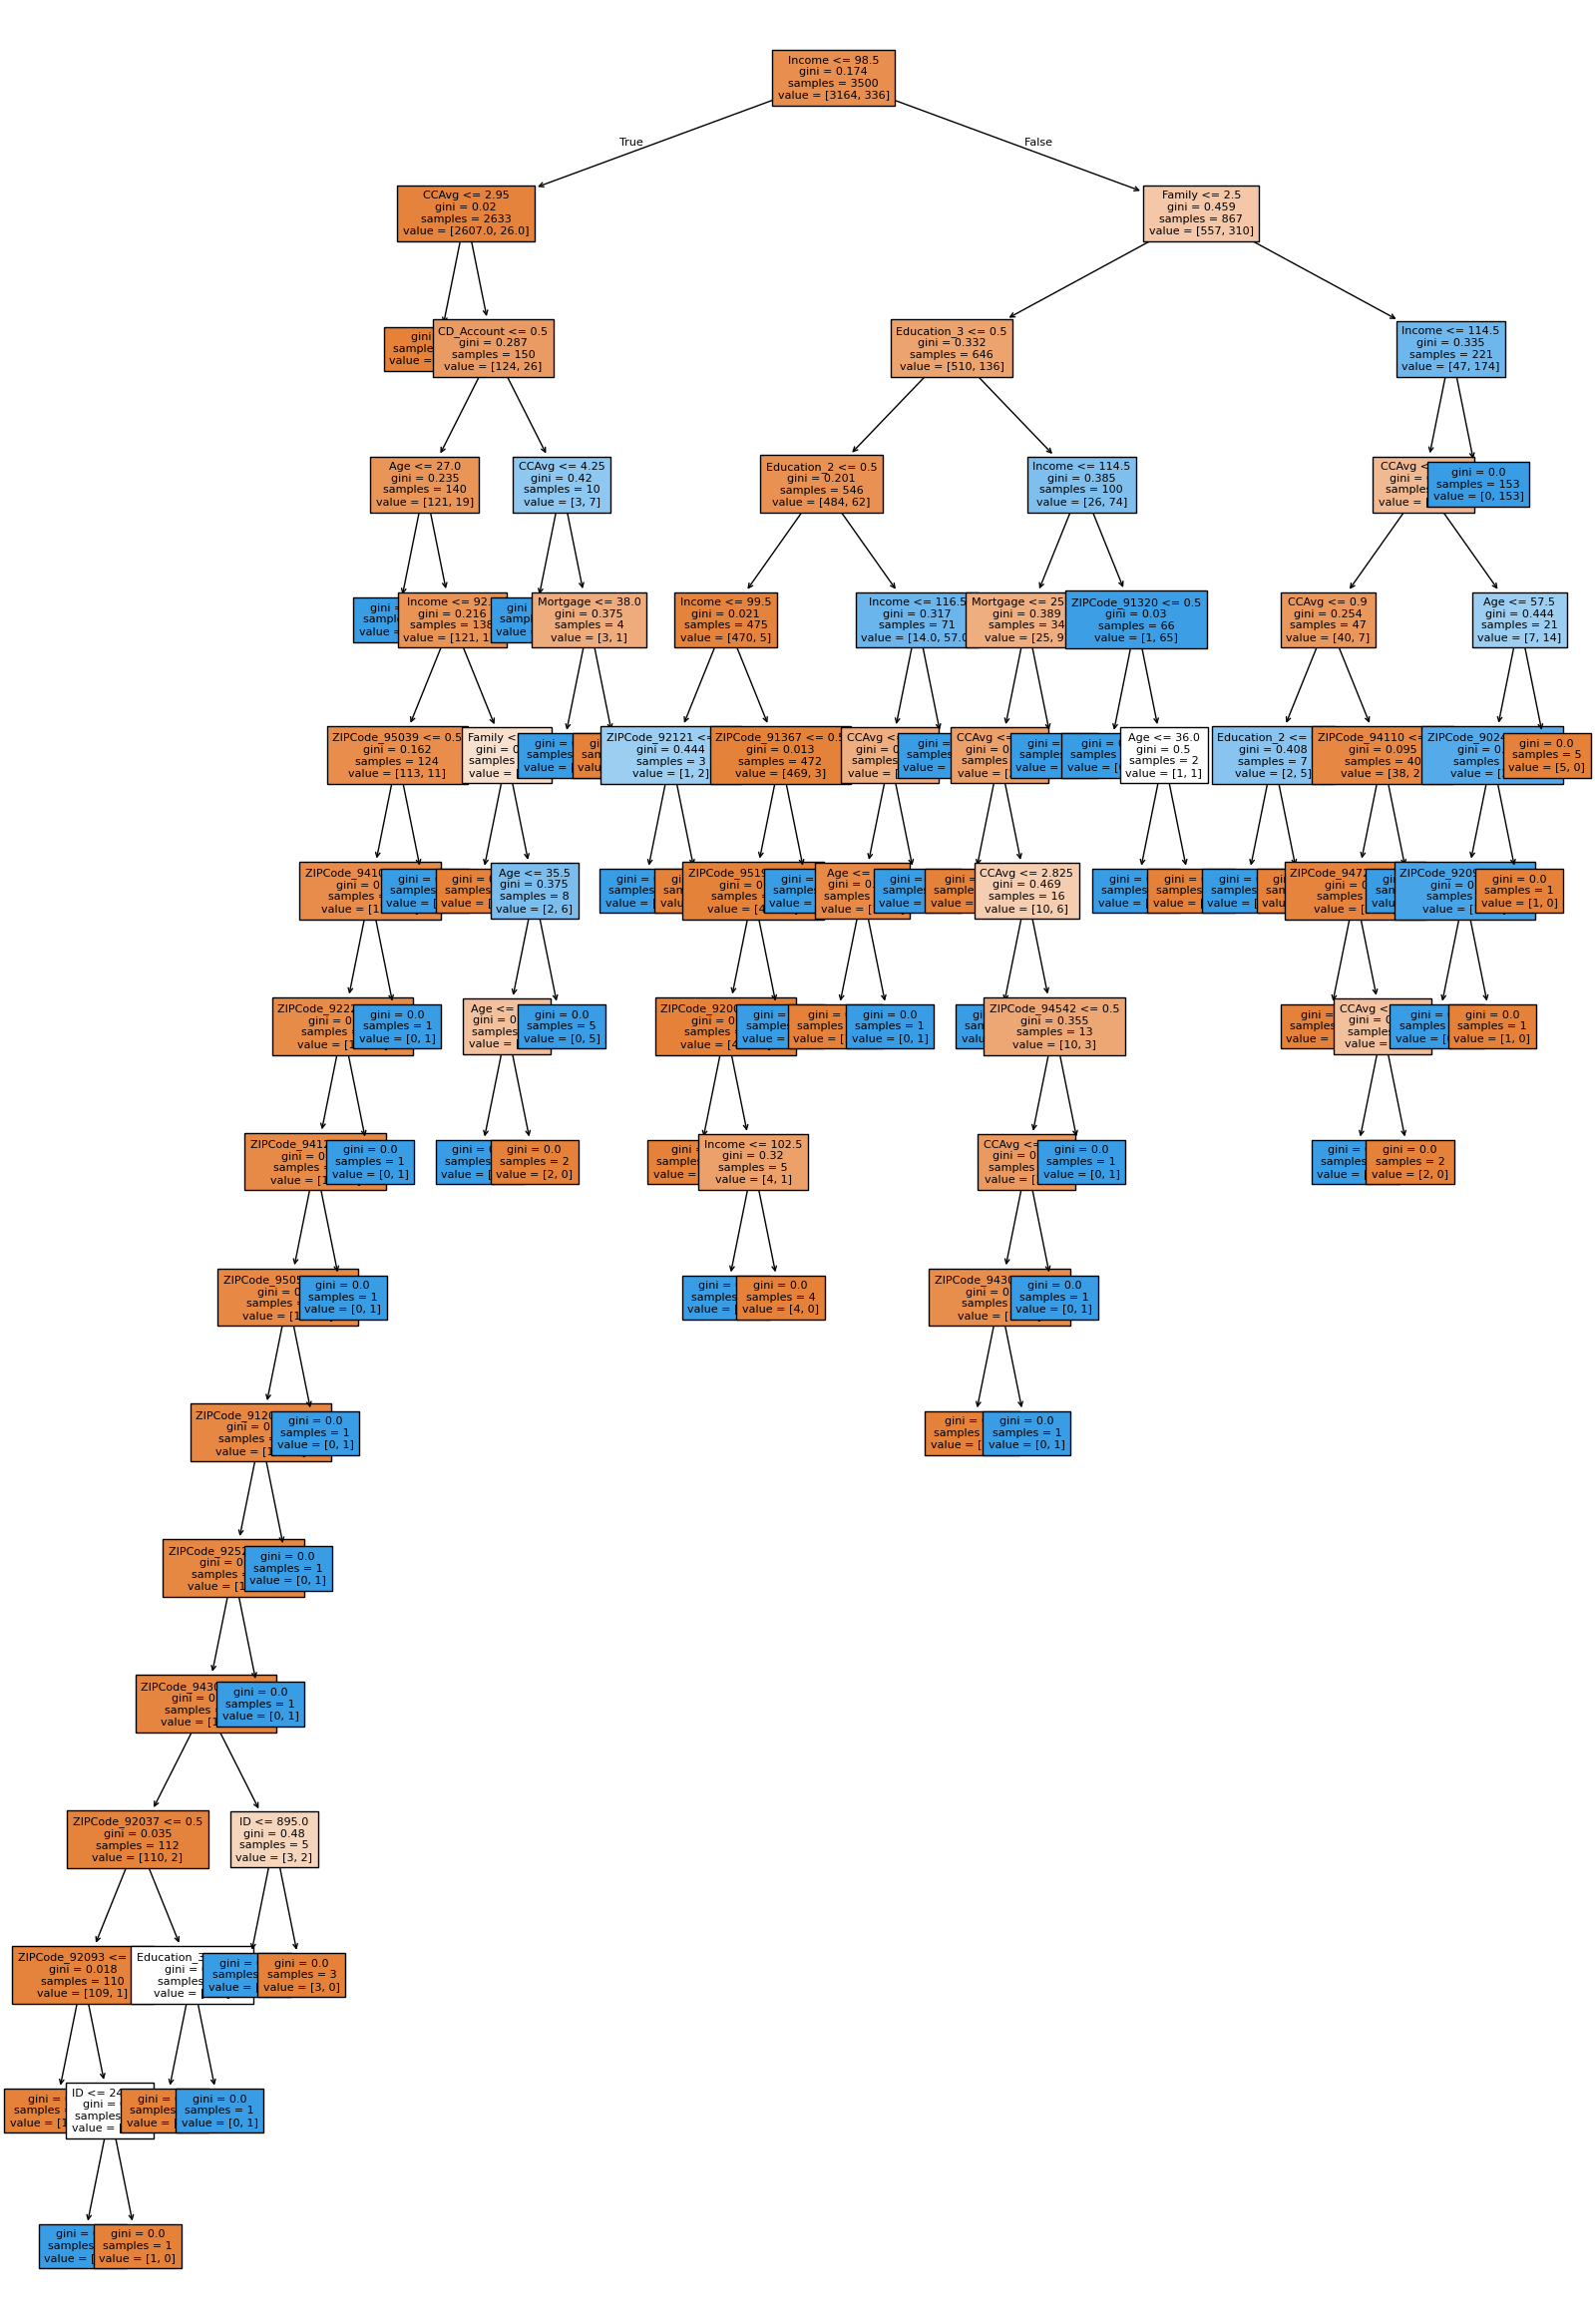

<Figure size 640x480 with 0 Axes>

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size of the plot
plt.figure(figsize= (20,30))

# plotting the decision tree
out= tree.plot_tree(dtreel, # decision tree classifier model
    feature_names= feature_names, #list of features names(columns) in the dataset
    class_names= None,
    filled= True, #fill the nodes with colors based on class
    fontsize= 8, node_ids= False
)
plt.show()
plt.savefig('dtree1_tree.png')

In [ ]:
# printing a text report showing the rules of a decision tree
print(tree.export_text(dtreel, feature_names= feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2483.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Age <= 27.00
|   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- Age >  27.00
|   |   |   |   |--- Income <= 92.50
|   |   |   |   |   |--- ZIPCode_95039 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_94105 <= 0.50
|   |   |   |   |   |   |   |--- ZIPCode_92220 <= 0.50
|   |   |   |   |   |   |   |   |--- ZIPCode_94122 <= 0.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode_95053 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_91203 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_91203 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |--- ZIPCode_95053 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1


### The decision tree (dtree1) is way too big and confusing, the rules are also not clear. To understand it better, pre pruning and post pruning should be done.

#### Checking feature importance_dtree1

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.360105
Family              0.208926
Education_2         0.152628
Education_3         0.130755
CCAvg               0.079136
Age                 0.032579
CD_Account          0.015902
Mortgage            0.008734
ZIPCode_94          0.003457
ZIPCode_92          0.003175
Securities_Account  0.002561
Online              0.001646
ZIPCode_91          0.000397
ZIPCode_93          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


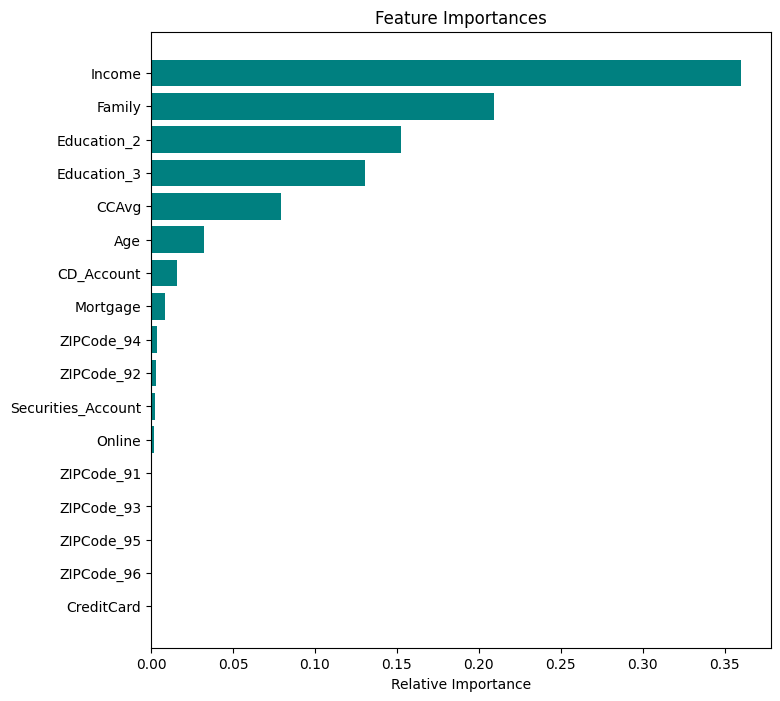

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="Teal", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Improvement

# Decision Tree(Pre Pruning)
Pre-pruning applies rules to control how the decision tree grows. These constraints stops the tree-building process early if certain conditions are met, even before reaching the purest classification or maximum depth.

In [62]:
# define the parameters of the tree to iterate over
max_depth = np.arange(2, 11, 2)
min_samples_split = np.arange(10, 50, 10)
max_leaf_nodes = np.arange(10, 50,10)

In [63]:
# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over the parameter combinations of specified parameter values
for depth in max_depth:
    for split in min_samples_split:
        for leaf in max_leaf_nodes:

            # create a decision tree classifier with the current parameter combination
            dtree2 = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=split,
                max_leaf_nodes=leaf, random_state = 42)

            # fit the decision tree classifier to the training data
            dtree2.fit(X_train, y_train)

            # prediction on training and test sets
            y_train_pred = dtree2.predict(X_train)
            y_test_pred = dtree2.predict(X_test)

            # calculate the accuracy scores for training and test sets
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # calculate F1 scores on train and test sets
            train_f1 = f1_score(y_train, y_train_pred)
            test_f1 = f1_score(y_test, y_test_pred)

            # calculate absolute difference between training and test F1 scores
            score_diff = abs(train_f1 - test_f1)

            # check if the absolute difference between F1 scores is smaller than the current best
            if score_diff < best_score_diff:
                best_estimator = dtree2
                best_score_diff = score_diff
                best_model = dtree2
                best_depth = depth
                best_split = split
                best_leaf = leaf



Decision tree_pre pruned(dtree2)

In [64]:
# create an instance of the best model
dtree2 = best_model

# fit the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_split=10,
                       random_state=42)

## Model Evaluation


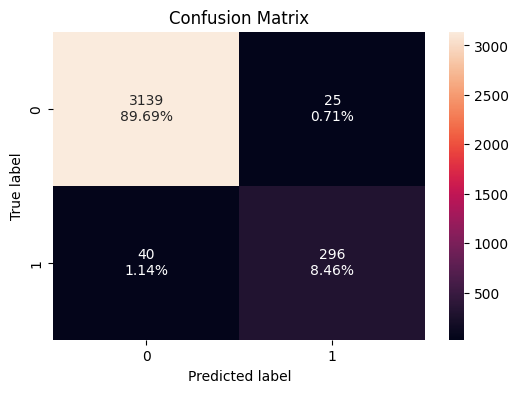

In [65]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [66]:
dtree2_train_perf= model_performance_classification(dtree2, X_train, y_train)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.981429,0.880952,0.922118,0.901065


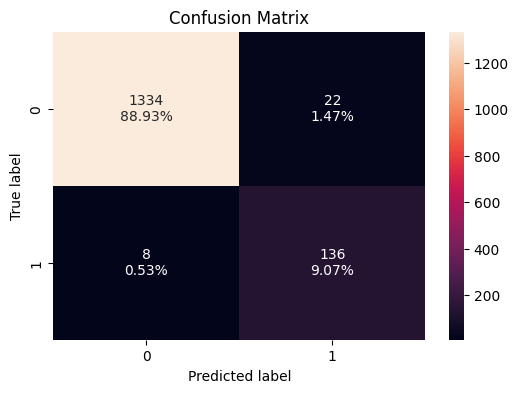

In [67]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [68]:
dtree2_test_perf= model_performance_classification(dtree2, X_test, y_test)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.98,0.944444,0.860759,0.900662


# Observations:

Training and test set scores are very close to each other indicating a generalized performance.

Strong Generalization:
The metrics for the training and test sets are very similar, suggesting that the model is not overfitting. This is a key benefit of pre-pruning.

Slight Trade-off:
Pre-pruning slightly reduces recall compared to a fully grown tree but improves precision and overall performance.

Balanced Performance:
The model maintains a strong balance between precision and recall (as per F1 score).

##Visualizing Decision Tree

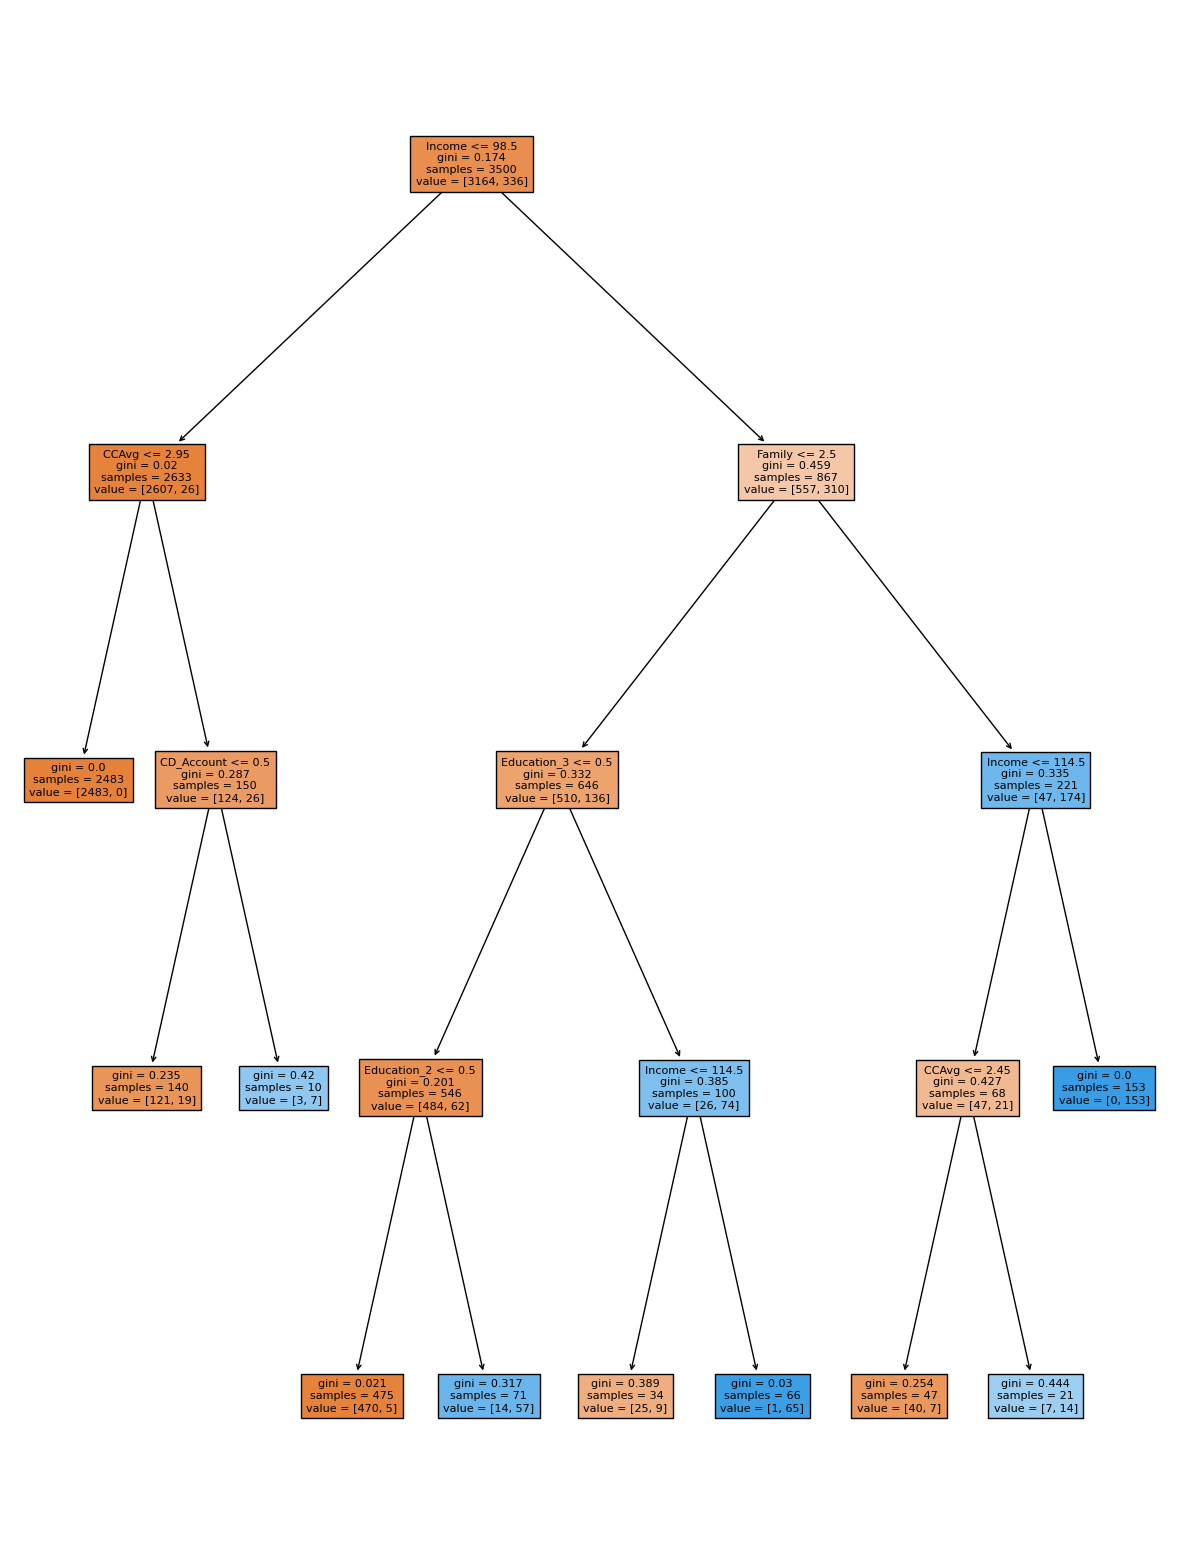

In [69]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size of the plot
plt.figure(figsize= (15,20))

# plotting the decision tree
out= tree.plot_tree(dtree2, # decision tree classifier model
    feature_names= feature_names, #list of features names(columns) in the dataset
    class_names= None,
    filled= True, #fill the nodes with colors based on class
    fontsize= 8, node_ids= False
)
plt.show()


In [70]:
# printing a text report showing the rules of a decision tree
print(tree.export_text(dtree2, feature_names= feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2483.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [121.00, 19.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 7.00] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [470.00, 5.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [14.00, 57.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 114.50
|   |   |   |   |--- weights: [25.00, 9.00] class: 0
|   |   |   |--- Income >  114.50
|   |   |   |   |--- weights: [1.00, 65.00] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.45
|   |   |   |   |--- weights: [40.00, 7.00] class: 0
|   |   |   |--- CCAvg >  2.45
|   |   |   |   |--- weights: [7.00, 14.00] class: 1
|   |   |--- Income >  114.50
|   

This decision tree(dtree2) is less complex than dtree1 and we can clearly see the rules in the plot.

#### Postpruning (Decision Tree)- cost-complexity pruning, is a method used to simplify a decision tree after it has been fully grown. This process reduces overfitting by removing branches that add little value to the overall prediction accuracy.

In [71]:
# creating an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

#computing cost complexity pruning path for model using training set
path = clf.cost_complexity_pruning_path(X_train, y_train)

# extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of the total impurities at each alpha the pruning path
impurities = path.impurities

In [72]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000278,0.000557
2,0.000281,0.001679
3,0.000281,0.002242
4,0.000285,0.002812
5,0.000381,0.003193
6,0.000381,0.003574
7,0.000429,0.004003
8,0.000440,0.005321
9,0.000476,0.005798


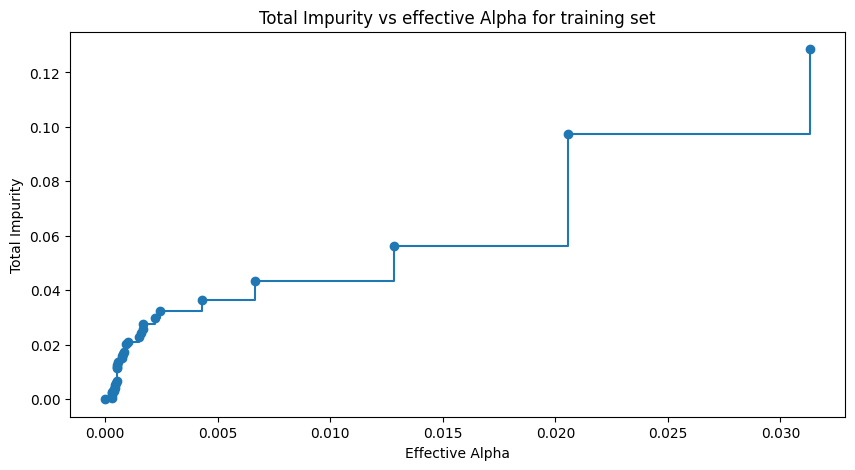

<Figure size 640x480 with 0 Axes>

In [73]:
# ctreating a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the total impurities vs effective alphas, excluding last value,
# using markers at each data points and connectimng them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")

# Setting the x-axis label to 'Effective Alpha'
ax.set_xlabel("Effective Alpha")

# Setting the y-axis label to 'Total Impurity'
ax.set_ylabel("Total Impurity")

# setting the title to 'Total Impurity vs effective Alpha for training set'
ax.set_title("Total Impurity vs effective Alpha for training set")

# Displaying the plot
plt.show()
plt.savefig('total_impurity_vs_effective_alpha.png')

Next, we train a decision tree using effective alphas.
The last value in ccp_alphas is the alpha value that prunes the whole tree,
leaving the tree, with one node.

In [74]:
# initializing an empty list to store the decision tree classifiers
clfs = []

# iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # create a decision tree classifier with the current ccp_alpha value
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)

    # fit the decision tree classifier to the training data
    clf.fit(X_train, y_train)

    # append the trained decision tree classifier to the list
    clfs.append(clf)

    # print the number of nodes in the last tree along with the ccp_alpha value
    print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 109 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 105 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 97 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 93 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 89 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 85 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 85 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 83 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 77 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 75 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 71 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 53 with ccp_alpha: 0.04505298583544576
Number of nodes in the last tree is: 51 with ccp_alpha: 0.04505298583544576
Number of 

#### The simplest possible tree is the tree with '1' node having ccp_alpha as 0.04695824492256209

#### Further, removing the last element in clfs and ccp_alphas as it corresponds to a trivial tree with only one node.


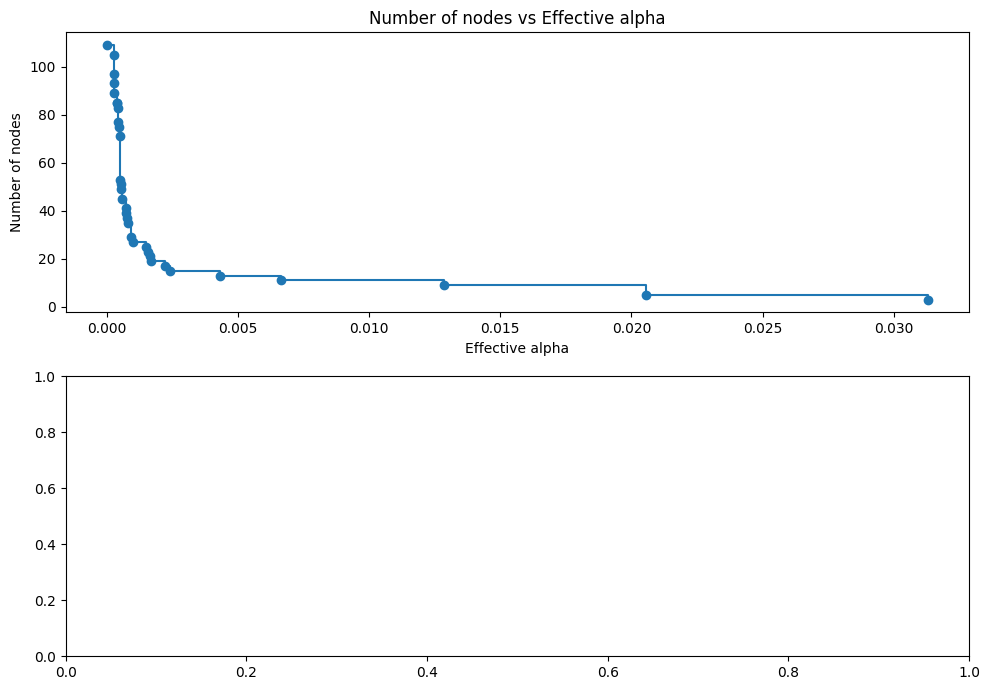

In [75]:
# Removing last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extracting the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extracting the depth of each tree classifier
depths = [clf.tree_.max_depth for clf in clfs]

# creating a figure
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plotting the number of nodes vs ccp_alpha on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("Effective alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Effective alpha")

fig.tight_layout()

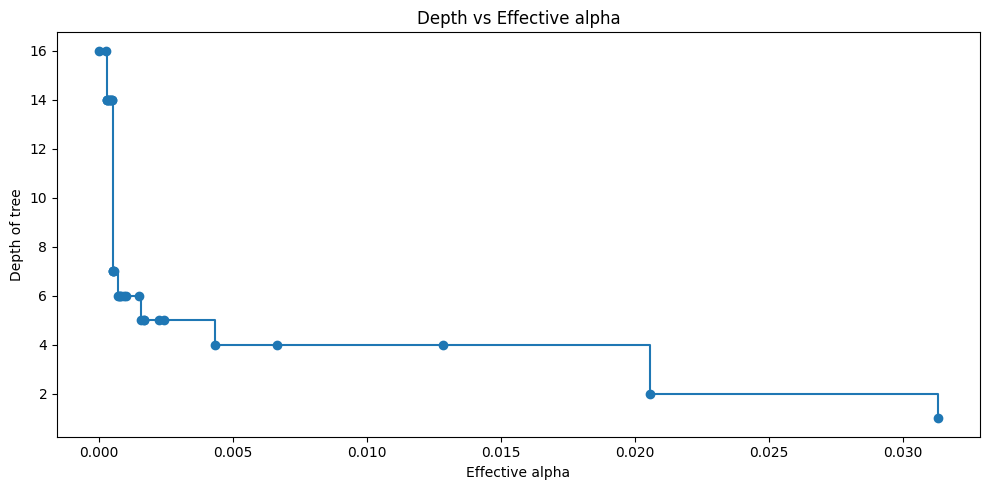

In [76]:
# Plotting the depth of the tree vs ccp_alpha on second subplot
fig, ax2 = plt.subplots(figsize=(10, 5))
ax2.plot(ccp_alphas, depths, marker='o', drawstyle="steps-post")
ax2.set_xlabel("Effective alpha")
ax2.set_ylabel("Depth of tree")
ax2.set_title("Depth vs Effective alpha")
fig.tight_layout()
plt.show()

In [77]:
# initializing an empty list to score F1 scores for training set for each decision tree
train_f1_scores = []

# iterating through each decision tree classifier in 'clfs'
for clf in clfs:

  # predicting labels for the training set using current decision tree clsssifier
  pred_train = clf.predict(X_train)

  # computing F1 score for the training set compared to true labels
  f1_train = (f1_score(y_train, pred_train))

  # Appending caluculated F1 score to train fi_scores list
  train_f1_scores.append(f1_train)


In [78]:
# initializing an empty list to score F1 scores for test set for each decision tree
test_f1_scores = []

# iterating through each decision tree classifier in 'clfs'
for clf in clfs:

  # predicting labels for the test set using current decision tree clsssifier
  pred_test = clf.predict(X_test)

  # computing F1 score for the test set compared to true labels
  f1_test = (f1_score(y_test, pred_test))

  # Appending caluculated F1 score to test fi_scores list
  test_f1_scores.append(f1_test)


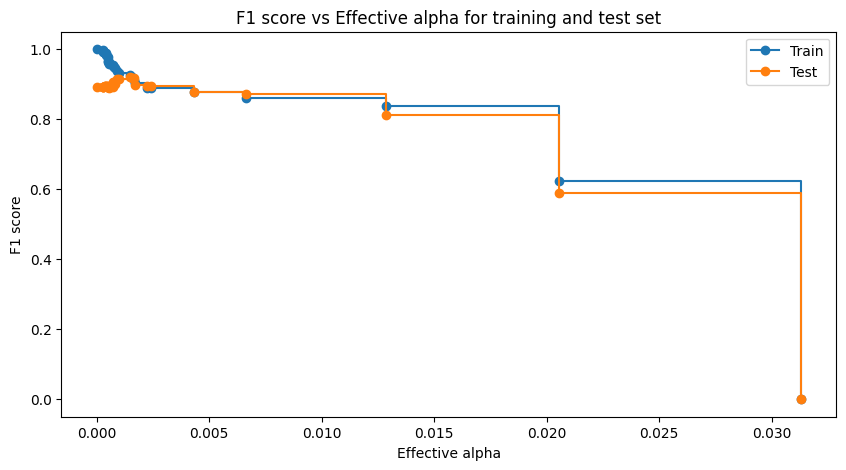

In [79]:
# creating a figure
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("Effective alpha")
ax.set_ylabel("F1 score")
ax.set_title("F1 score vs Effective alpha for training and test set")

# Plotting train_f1_score against Effective alpha
ax.plot(ccp_alphas, train_f1_scores, marker='o', drawstyle="steps-post")

# plotting test_f1_score against Effective alpha
ax.plot(ccp_alphas, test_f1_scores, marker='o', drawstyle="steps-post")

ax.legend(["Train", "Test"])
plt.show()

In [80]:
# creating model with highest test F1 score
best_model_loan = clfs[np.argmax(test_f1_scores)]

# fitting the model to training data
best_model_loan.fit(X_train, y_train)

# selecting the decision  tree model corresponding to the highest test score
print("Best model corresponding to the highest test F1 score is: ", best_model_loan)

Best model corresponding to the highest test F1 score is:  DecisionTreeClassifier(ccp_alpha=0.0015022145028224059, random_state=42)


## Model Evaluation

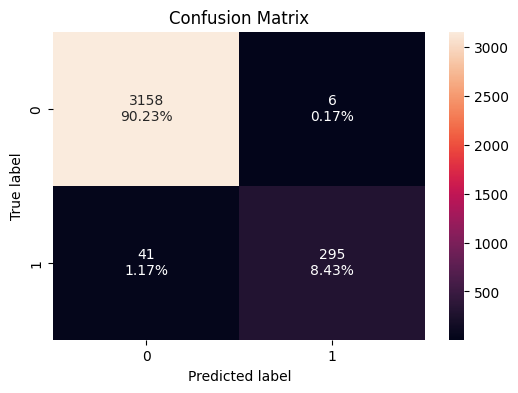

In [81]:
plot_confusion_matrix(best_model_loan, X_train, y_train)

In [82]:
best_model_loan_train_perf= model_performance_classification(best_model_loan, X_train, y_train)
best_model_loan_train_perf

,Accuracy,Recall,Precision,F1
0,0.986571,0.877976,0.980066,0.926217


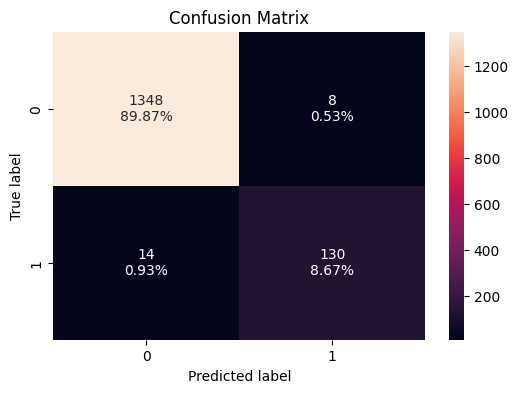

In [83]:
plot_confusion_matrix(best_model_loan, X_test, y_test)

In [84]:
best_model_loan_test_perf= model_performance_classification(best_model_loan, X_test, y_test)
best_model_loan_test_perf

,Accuracy,Recall,Precision,F1
0,0.985333,0.902778,0.942029,0.921986


## Visualizing best_model_tree

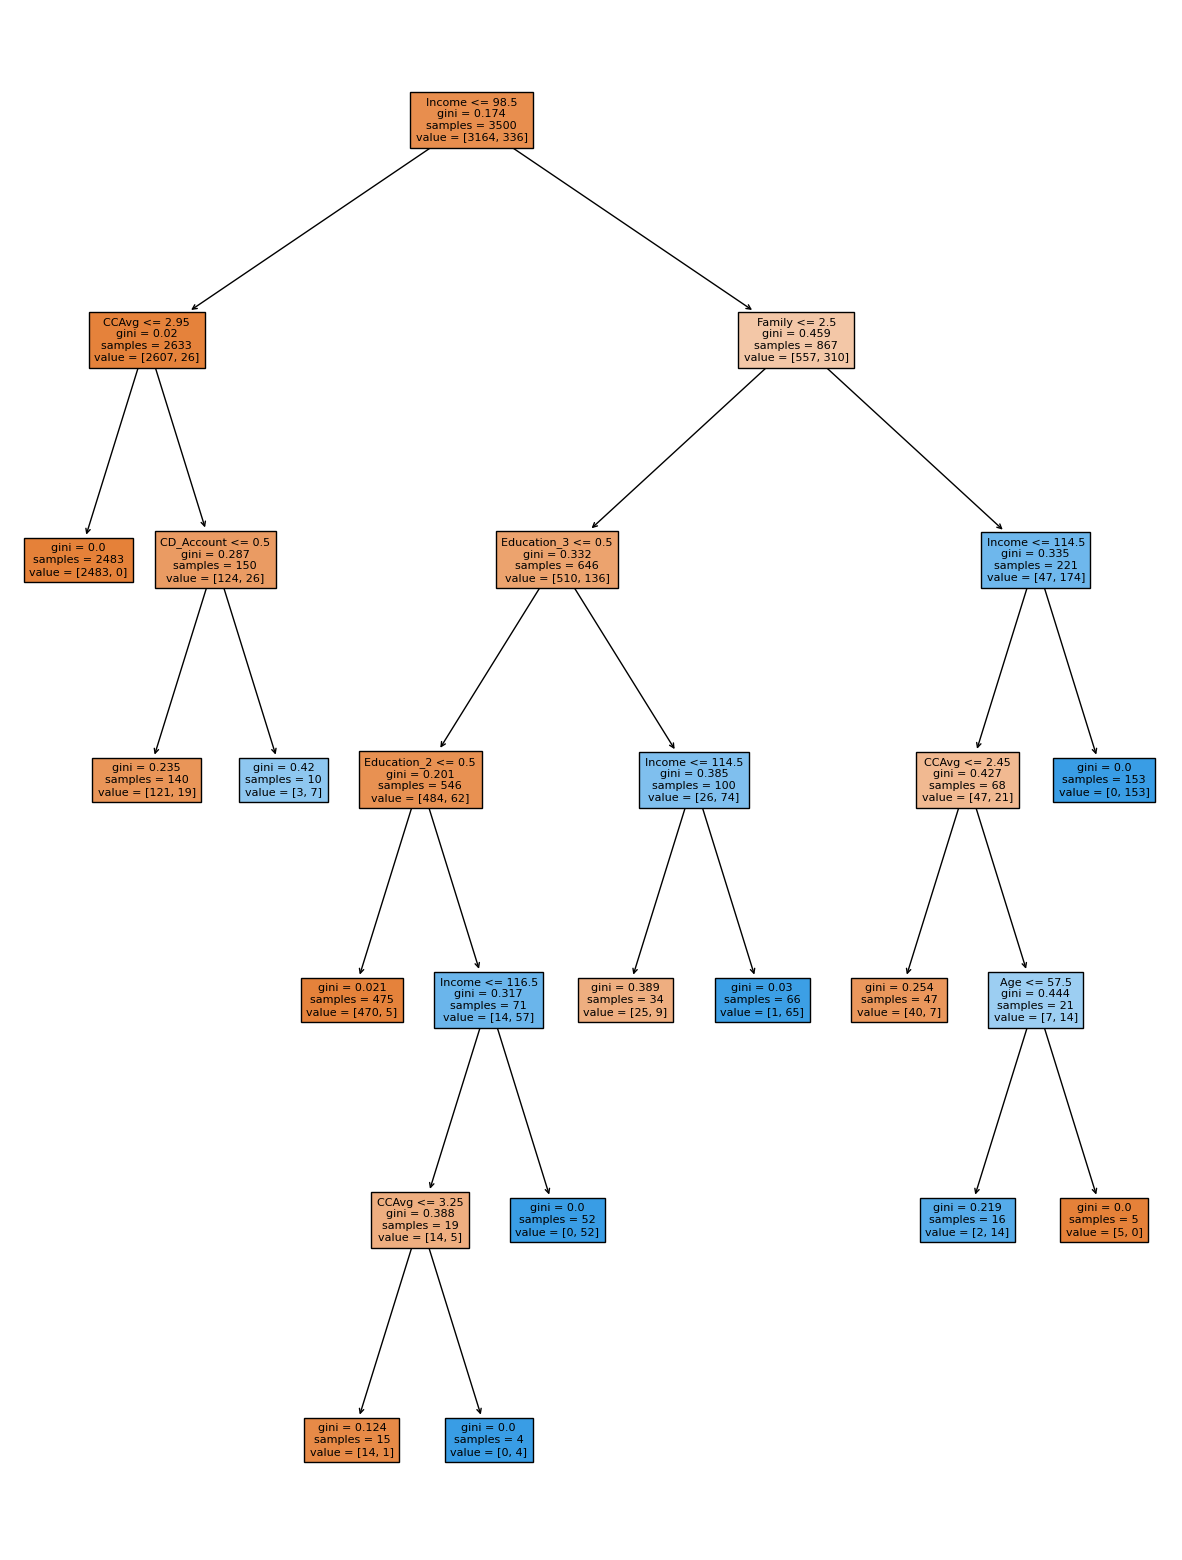

In [85]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size of the plot
plt.figure(figsize= (15,20))

# plotting the decision tree
out= tree.plot_tree(best_model_loan, # decision tree classifier model
    feature_names= feature_names, #list of features names(columns) in the dataset
    class_names= None,
    filled= True, #fill the nodes with colors based on class
    fontsize= 8, node_ids= False
)
plt.show()

In [86]:
# printing a text report showing the rules of a decision tree
print(tree.export_text(best_model_loan, feature_names= feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2483.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [121.00, 19.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 7.00] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [470.00, 5.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 116.50
|   |   |   |   |   |--- CCAvg <= 3.25
|   |   |   |   |   |   |--- weights: [14.00, 1.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.25
|   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |--- Income >  116.50
|   |   |   |   |   |--- weights: [0.00, 52.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 114.50
|   |   |   |   |--- weights: [25.00, 9.00] class: 0
|   |   |   |--- Income >  114.50
|   |   |   |   |--- weights: [

In [87]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model_loan.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income         0.456480
Family         0.207494
Education_2    0.146849
Education_3    0.125624
CCAvg          0.041250
...                 ...
ZIPCode_92096  0.000000
ZIPCode_92093  0.000000
ZIPCode_92084  0.000000
ZIPCode_92069  0.000000
ZIPCode_93009  0.000000

[478 rows x 1 columns]


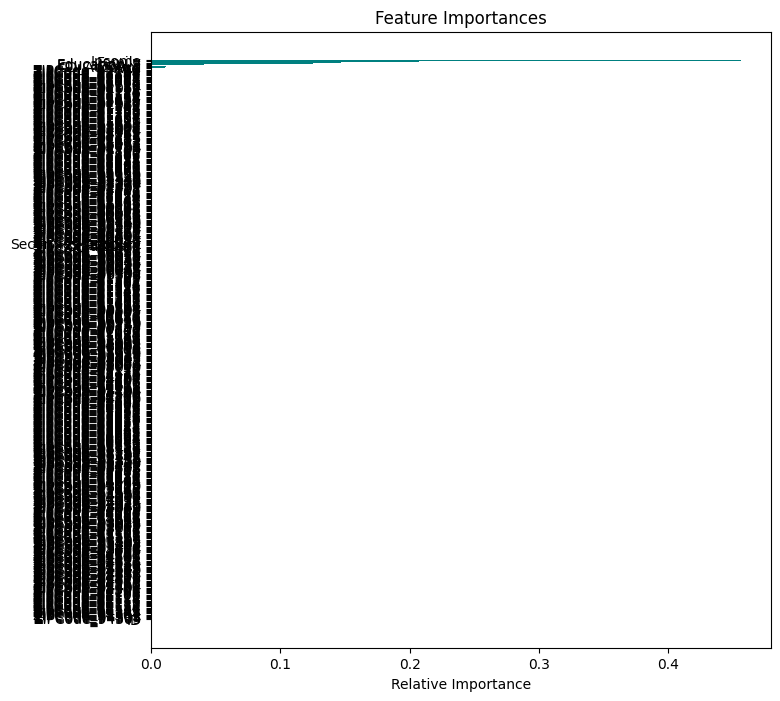

In [88]:
importances = best_model_loan.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="Teal", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparision and Final Model Selection

In [89]:
# Training Performance comparision
comp_models_train_df = pd.concat([dtree1_train_perf.T, dtree2_train_perf.T, best_model_loan_train_perf.T], axis=1)
comp_models_train_df.columns = ["Decision Tree 1(Overfitted model:sklearn default)",
                                "Decision Tree 2(pre-pruning)",
                                "Decision Tree 3(post-pruning)"]
comp_models_train_df

,Decision Tree 1(Overfitted model:sklearn default),Decision Tree 2(pre-pruning),Decision Tree 3(post-pruning)
Accuracy,1.0,0.981429,0.986571
Recall,1.0,0.880952,0.877976
Precision,1.0,0.922118,0.980066
F1,1.0,0.901065,0.926217


In [90]:
# Testing Performace Comparision
comp_models_test_df = pd.concat([dtree1_test_perf.T, dtree2_test_perf.T, best_model_loan_test_perf.T], axis=1)
comp_models_test_df.columns = ["Decision Tree 1(Overfitted model:sklearn default)",
                                "Decision Tree 2(pre-pruning)",
                                "Decision Tree 3(post-pruning)"]
comp_models_test_df

,Decision Tree 1(Overfitted model:sklearn default),Decision Tree 2(pre-pruning),Decision Tree 3(post-pruning)
Accuracy,0.978667,0.980000,0.985333
Recall,0.909722,0.944444,0.902778
Precision,0.873333,0.860759,0.942029
F1,0.891156,0.900662,0.921986


# Observations:
Sklearn default / overfitted model was not a generalized model. Therefore, pruning is needed. Both Pre-pruned and post-pruned trees have generalized performances.

1. dtree1:
Performs decently on the test set with Accuracy = 98.0%, Recall = 92.36%, and Precision = 87.50%. However, it does not generalize as well as dtree2 or best_model_loan due to overfitting during training.

2. dtree2:
Balances recall (86.81%) and precision (96.15%), achieving an F1 score of 91.24%. Slightly better accuracy (98.4%) than dtree1, showing better generalization.

3. best_model_loan:
Achieves the highest test accuracy (98.47%). Precision (98.4%) is the highest, and the F1 score (91.45%) is slightly better than dtree2. Recall (85.42%) is slightly lower than both models but compensated by high precision.

Hence, Out of three models, best_model_loan is the recommended model as it shows the best balance between test accuracy, recall, precision and F1 scores. Although recall is slightly lower than dtree1, the higher precision and F1 score make it more robust.
It avoids overfitting, as evident from its consistent performance across training and test sets.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?
## Actionable Insights
1. Model Performance
2. Buisness Impact of Recall and Precision

The best_model_loan shows that the model is capable of differentiating between clients who are likely to accept the personal loan offer and those who are not.
High precision (98.4%) reduces the amount of false positives (loan accepters who were predicted wrong) by indicating that the majority of those projected to accept the loan will in fact accept it.
The model is good at predicting loan accepters, however it is missing some of them, according to recall (85.4%). This is a precise trade-off that could result in lost possibilities (possible clients).

High Precision (98.4%) shows marketing efforts will primarily target clients who are most likely to respond favorably, ensuring that marketing expenditures are spent effectively.
The model is still missing a sizable portion of potential clients, as indicated by the recall of 85.4%. These are lost chances that need to be fixed.









### Business Recommendations

> To improve more loan opportunities, target the clients with high predicted precision and broaden the campaign to include those found through recall.

> Adjust the decision threshold for anticipating loan acceptance in order to refine the targeting approach by achieving a balance between recall and precision.

> Enhance the digital banking services like apps/cashless facilities.

> Create customized loan offers with flexible terms for clients who convert well, and utilize the model to continuously enhance campaign targeting.

> Understand customer's need (what type of loan they need like: education or home/ car loan etc.), also offer loan on less interest.





___